In [2]:
pip install prince


Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install geopandas

In [4]:
pip install geodatasets

Note: you may need to restart the kernel to use updated packages.


In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from prince import mca

In [102]:
#base deep seas
file_path2 = "C:/Users/Utilisateur/Documents/École/S1/python/Deepseas/20177113_DS_D3.1-SEAS2-dataset-2022_rev1.csv"

df = pd.read_csv(file_path2, sep=';', encoding='utf-8', low_memory=False, na_values=" ", decimal=',')
df.describe() 


,Respondent_Serial,INTRO_CATI,INTRO_CAWI,SD_1,SD_2,QSD_2,SD_3,REG_CAT,REG,REG_quota,...,cbsqf_alc,c1cbsqf_alc,cRSOD_1a,SD_20_income_type,SD_20,SD_20A,SD_20B,SD_20C,sd_20month,inc_mth
count,5.601400e+04,8810.0,47204.0,56014.000000,56014.000000,56014.000000,56014.000000,1516.000000,56014.000000,56014.000000,...,55483.000000,55483.000000,47091.000000,47831.000000,2.974800e+04,16068.000000,1.270800e+04,4.245600e+04,4.245600e+04,4.245600e+04
mean,5.782639e+08,1.0,1.0,1.518781,41.056486,2.073624,16.854197,1.509235,297.832167,1668.286946,...,777.543117,763.731402,158.253150,0.280508,4.147129e+05,1811.889283,6.781278e+04,3.108782e+05,4.172756e+04,1.965886e+04
std,1.637197e+09,0.0,0.0,0.501969,12.820770,0.872051,10.191840,0.982645,187.392295,997.947320,...,1922.011090,1740.420721,134.101578,0.449252,1.872299e+06,3628.254842,1.784258e+05,1.578282e+06,1.432824e+05,8.073478e+04
min,1.900000e+01,1.0,1.0,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,101.000000,...,-1.000000,-1.000000,0.000000,0.000000,1.875000e+02,0.000000,1.875000e+02,1.875000e+02,1.250000e+02,1.250000e+01
25%,1.737850e+04,1.0,1.0,1.000000,30.000000,1.000000,8.000000,1.000000,114.000000,801.000000,...,27.625000,27.625000,48.500000,0.000000,2.000000e+03,79.000000,1.950500e+03,2.000000e+03,1.500042e+03,6.944444e+02
50%,3.636400e+04,1.0,1.0,2.000000,41.000000,2.000000,16.000000,1.000000,325.000000,1606.000000,...,195.000000,195.000000,107.600000,0.000000,4.500000e+03,169.000000,5.250000e+03,4.500500e+03,3.000500e+03,1.400000e+03
75%,5.647075e+04,1.0,1.0,2.000000,52.000000,3.000000,26.000000,2.000000,411.000000,2502.000000,...,727.420000,727.420000,246.400000,1.000000,3.000000e+04,338.000000,3.499950e+04,3.250050e+04,1.125000e+04,4.500000e+03
max,7.600002e+09,1.0,1.0,3.000000,64.000000,3.000000,43.000000,4.000000,1477.000000,3409.000000,...,63119.632500,18250.000000,400.000000,1.000000,1.656000e+07,9999.000000,1.500000e+06,1.656000e+07,1.380000e+06,1.380000e+06


In [50]:
df.shape

(56014, 191)

In [106]:
variables = ["COUNTRY","SD_1", "SD_2", "SD_4","SD_6", "SD_7", 
             "SD_8","SD_9", "SD_10", "sd_20month", "Demo_Empl" ,"social_class",
             "bsqf_alc", "f_1b", "RSOD_5a", "RSOD_5b", "RSOD_5c", "cbsqf_beer", "cbsqf_spir", "cbsqf_wine",
             "RSOD_5d", "RSOD_2b", "RSOD_7b", "CH_1", "WB_1", "WB_2", "WB_3"]
data = df[variables]
#expliquer sélection: la plupart des variables étaient redondantes...


In [5]:
data.dtypes

COUNTRY           int64
SD_1              int64
SD_2              int64
SD_4              int64
SD_6              int64
SD_7            float64
SD_8              int64
SD_9              int64
SD_10             int64
sd_20month      float64
Demo_Empl       float64
social_class      int64
bsqf_alc        float64
f_1b              int64
RSOD_5a         float64
RSOD_5b         float64
RSOD_5c         float64
cbsqf_beer      float64
cbsqf_spir      float64
cbsqf_wine      float64
RSOD_5d         float64
RSOD_2b         float64
RSOD_7b         float64
CH_1              int64
WB_1              int64
WB_2              int64
WB_3              int64
dtype: object

In [ ]:
"""def remplace(data, variables):
    for var in variables :
        data[var] = data[var].str.strip()
        data[var] = data[var].replace('', np.nan)

remplace(data,  data.select_dtypes(include='object').columns)
reel = ["SD_2","sd_20month", "bsqf_alc", 'rf_1b']
entier = ["SD_7", "rrsod_2b","rrsod_7b"]
quali=data.columns.drop(reel + entier)

data['bsqf_alc'] = data["bsqf_alc"].str.replace(',','.')
data['sd_20month'] = data["sd_20month"].str.replace(',','.')
data['rf_1b'] = data["rf_1b"].str.replace(',','.')
data['rrsod_2b'] = data["rrsod_2b"].str.replace(',','.')
data['rrsod_7b'] = data["rrsod_7b"].str.replace(',','.')
data[reel] = data[reel].astype('float')
data[entier]= data[entier].astype("float")
data[quali] = data[quali].astype('object')
data.dtypes"""

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3332\1655508061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[var] = data[var].str.strip()
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3332\1655508061.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[var] = data[var].replace('', np.nan)
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_3332\1655508061.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

COUNTRY          object
SD_1             object
SD_2            float64
SD_4             object
SD_6             object
SD_7            float64
SD_8             object
SD_9             object
SD_10            object
sd_20month      float64
Demo_Empl        object
social_class     object
bsqf_alc        float64
rf_1b           float64
RSOD_5a          object
RSOD_5b          object
RSOD_5c          object
RSOD_5d          object
rrsod_2b        float64
rrsod_7b        float64
CH_1             object
WB_1             object
WB_2             object
WB_3             object
dtype: object

In [107]:
country_mapping = {
    10: 'Austria',
    11: 'Belgium',
    12: 'BosniaHerzegovina',
    13: 'Bulgaria',
    14: 'Catalunya',
    15: 'Croatia',
    16: 'Cyprus',
    17: 'Czech Republic',
    18: 'Denmark',
    19: 'Estonia',
    20: 'Finland',
    21: 'France',
    22: 'Germany',
    23: 'Greece',
    24: 'Hungary',
    25: 'Iceland',
    26: 'Ireland',
    27: 'Italy',
    28: 'Latvia',
    29: 'Lithuania',
    30: 'Luxembourg',
    31: 'Malta',
    32: 'Moldova',
    33: 'Netherlands',
    34: 'Norway',
    35: 'Poland',
    36: 'Portugal',
    37: 'Romania',
    38: 'Serbia',
    39: 'Slovakia',
    40: 'Slovenia',
    41: 'Spain',
    42: 'Sweden',
    43: 'United Kingdom',
}
data['COUNTRY'] = data['COUNTRY'].map(country_mapping)

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_24460\3856511148.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['COUNTRY'] = data['COUNTRY'].map(country_mapping)


In [108]:
data.apply(lambda x: x.isna().mean())

COUNTRY         0.000000
SD_1            0.000000
SD_2            0.000000
SD_4            0.000000
SD_6            0.000000
SD_7            0.212215
SD_8            0.000000
SD_9            0.000000
SD_10           0.000000
sd_20month      0.242047
Demo_Empl       0.312583
social_class    0.000000
bsqf_alc        0.009480
f_1b            0.000000
RSOD_5a         0.456529
RSOD_5b         0.456529
RSOD_5c         0.456529
cbsqf_beer      0.000000
cbsqf_spir      0.000000
cbsqf_wine      0.000000
RSOD_5d         0.456529
RSOD_2b         0.268701
RSOD_7b         0.502357
CH_1            0.000000
WB_1            0.000000
WB_2            0.000000
WB_3            0.000000
dtype: float64

Les variables présentant des variables manquantes dans des proportions potentiellement problématiques sont:
SD_7: le nombre de mineur dans le foyer de l'individu (21% de NA)
SD_20month : le revenu du ménage par mois (24% de NA)
Demo_Empl: si temps partiel, temps plein ou autre (31% de NA)
Les RSOD_5...: les lieux de consommation d'alcool (46% de NA)
RSOD_2b : Fréquence 4/6+ verres en nombre de jours par an (46% de NA) ;
RSOD_7b : Fréquence 8/12+ verres en nombre de jours par an (50% de NA)

Nous les traiterons une par une par la suite.

Les valeurs manquantes ne dérangent pas sur SD_11 car social_class est un bon proxy de cette variable, on pourra se passer de SD11 (étonnant d'ailleurs que deux variables aussi similaires et des taux de valeurs manquantes aussi différents: 31% vs. 0%).

In [109]:
variables = ['RSOD_5a', 'RSOD_5b', 'RSOD_5c', 'RSOD_5d']

#Pourcentage d'observations où TOUTES les variables RSOD_5... sont manquantes
pourcentage_observations_manquantes_communes = data[variables].isna().all(axis=1).mean()

print(f"Nombre d'observations où toutes les variables sont manquantes : {pourcentage_observations_manquantes_communes}")

Nombre d'observations où toutes les variables sont manquantes : 0.4565287249616167


Les valeurs manquantes des RSOD_5... sont les mêmes, donc quand on ne connait pas la récurrence de consommation d'alcool dans un lieu, on ne la connaît pour aucun.

In [110]:
missing_by_country = data.groupby('COUNTRY').apply(lambda x: x.isna().mean())
missing_by_country["bsqf_alc"]

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_24460\2176492060.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_country = data.groupby('COUNTRY').apply(lambda x: x.isna().mean())


COUNTRY
Austria              0.018094
Belgium              0.009309
BosniaHerzegovina    0.004667
Bulgaria             0.002329
Catalunya            0.011873
Croatia              0.002663
Cyprus               0.008667
Czech Republic       0.006662
Denmark              0.012018
Estonia              0.005563
Finland              0.000000
France               0.017564
Germany              0.023179
Greece               0.001314
Hungary              0.012942
Iceland              0.036667
Ireland              0.006662
Italy                0.003989
Latvia               0.003989
Lithuania            0.009229
Luxembourg           0.004648
Malta                0.029333
Moldova              0.001333
Netherlands          0.013298
Norway               0.014000
Poland               0.000641
Portugal             0.004660
Romania              0.005319
Serbia               0.007989
Slovakia             0.007973
Slovenia             0.014637
Spain                0.006647
Sweden               0.007371
Un

In [56]:
#Peu de valeurs manquantes dans la consommation d'alcool en cl d'alcool pur bsqf_alc (moins de 2% sauf islande, allemagne et malte moins de 3.6%) 
# donc on peut supprimer les individus qui présentent des valeurs manquantes pour cette variable sans créer de biais de sélection.

data= data.dropna(subset=['bsqf_alc'])
sum(data['bsqf_alc'].isna())

0

In [57]:
#TRAITONS LES RSOD_2b et RSOD_7b

#regardons si, de façon cohérente, les valeurs manquantes de RSOD_2b sont incluses dans celles de RSOD_7b qui en a davantage

print(f"NA uniquement dans 2b: {(data['RSOD_2b'].isna() & data['RSOD_7b'].notna()).sum()}")
print(f"NA uniquement dans 7b: {(data['RSOD_2b'].notna() & data['RSOD_7b'].isna()).sum()}")

NA uniquement dans 2b: 0
NA uniquement dans 7b: 13000


Donc si des valeurs sont manquantes dans RSOD_2b elles le sont bien aussi dans RSOD_7b, donc les gens qui n'ont pas répondu à leur fréquence de consommation d'alcool de 4/6+ verres n'ont pas non plus répondu celle de 8/12+ verres .

In [58]:
# Filtre les lignes où les deux sont renseignées
commune = data[data['RSOD_2b'].notna() & data['RSOD_7b'].notna()]

# Vérifie l'égalité et les cas où 7b > 2b (impossible logiquement)
print(f"Valeurs identiques : {(commune['RSOD_2b'] == commune['RSOD_7b']).sum()}")
print(f"Valeurs différentes : {(commune['RSOD_2b'] != commune['RSOD_7b']).sum()}")
print(f"Incohérences (7b > 2b) : {(commune['RSOD_7b'] < commune['RSOD_2b']).sum()}")

Valeurs identiques : 15475
Valeurs différentes : 12358
Incohérences (7b > 2b) : 0


On vérifie qu'il n'y a pas d'incohérence, i.e d'individus qui ont déclaré une fréquence plus élevée de consommation de plus de 8/12 verres que de plus de 4/6 verres.
Puisque les RSOD_2b/7b sont codées comme suit:

Frequency of
drinking 4/6+ (resp. 8/12+ )
drinks
- 1 = Every day
- 2 = 5-6 days a week
- 3 = 3-4 days a week
- 4 = 1 - 2 days a week
- 5 = 2 - 3 days a month
- 6 = One day in a month
- 7 = 6 - 11 days a year
- 8 = 2 - 5 days a year
- 9 = a single day in the past 12 months
- 10 = I did not drink in the past 12 months

On vérifie seulement que:

commune['RSOD_7b'] < commune['RSOD_2b']

On remarque qu'aucun individu est dans ce cas, il n'y a donc pas de déclaration incohérente sur ce point, ou elles ont été corrigées a posteriori.

Comme RSOD_7b a 50% de valeurs manquantes, on décide de l'abandonner pour ne garder que RSOD_2b qui en a 27%. On ne perd pas trop d'information dû à ce qu'on vient de vérifier sur la relation entre ces deux variables. On retiendra que l'on perd tout de même un peu d'information sur les alcoolisations ponctuelles importantes.

In [59]:
#Problème: On a remarqué en ouvrant la base sur excel (ça n'est donc pas une erreur d'interprétation des séparateurs) qu'il y a à la fois des 0 et des NA pour ces variables
#Alors que ce sont des catégorielles sans catégories 0 D'APRES LE CODEBOOK
#Comptons le nombre de 0 et de valeurs manquantes pour RSOD_2b
print(data.loc[data["RSOD_2b"]==0,"RSOD_2b"].count(),
data["RSOD_2b"].isna().sum())


5286 14650


In [17]:
# Le codebook pourrait-il se tromper ?
# Essayons de voir combien d'individus correspondent à chaque code catégoriel de 1 à 10 possible:
print(data['RSOD_2b'].value_counts(dropna=False).sort_index())

RSOD_2b
0.0     5286
1.0      939
2.0      963
3.0     2597
4.0     4244
5.0     5590
6.0     3055
7.0     4499
8.0     6383
9.0     7277
NaN    14650
Name: count, dtype: int64


Il n'y a pas d'observation codée 10, il est cohérent de penser que le code book contient une erreur et que c'est le code 0 qui correspond à "I did not drink in the past 12 months [4/6+ drinks]" et non pas le code 10.
Pour le vérifier, on va essayer de voir si les individus codés 0 ??????????????? COMMENT VERIFIER + ou - CA ????? avec bsqf_alc et/ou f_1b.

Rappel:codage de f_1b

generic
frequency of
drinking
1 = Every day
2 = 5-6 days a week
3 = 3-4 days a week
4 = 1 - 2 days a week
5 = 2 - 3 days a month
6 = One day in a month
7 = 6 - 11 days a year
8 = 2 - 5 days a year
9 = a single day in the past 12 months
10 = I did not drink but I drank earlier
11 = I never drank in my life

In [24]:
#On regarde quelle est la distribution de la variable f_1b

#print(data['f_1b'].value_counts(dropna=False).sort_index())

In [23]:
data.loc[(data['RSOD_2b']==0) & ((data['f_1b'] == 10) |  (data['f_1b'] == 11)), 'RSOD_2b'].count()

5286

Les individus ayant n'ayant jamais consommé d'alcool dans les 12 derniers mois ou durant toute leur vie sont biens les mêmes qui ont RSOD_2b=0.
Le code 10 est bien devenu 0.

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_24460\1511241501.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RSOD_2b_temp'] = data['RSOD_2b'].replace(0, 10)
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_24460\1511241501.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['f_1b_label'] = data['f_1b'].map(labels_f1b)
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_24460\1511241501.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

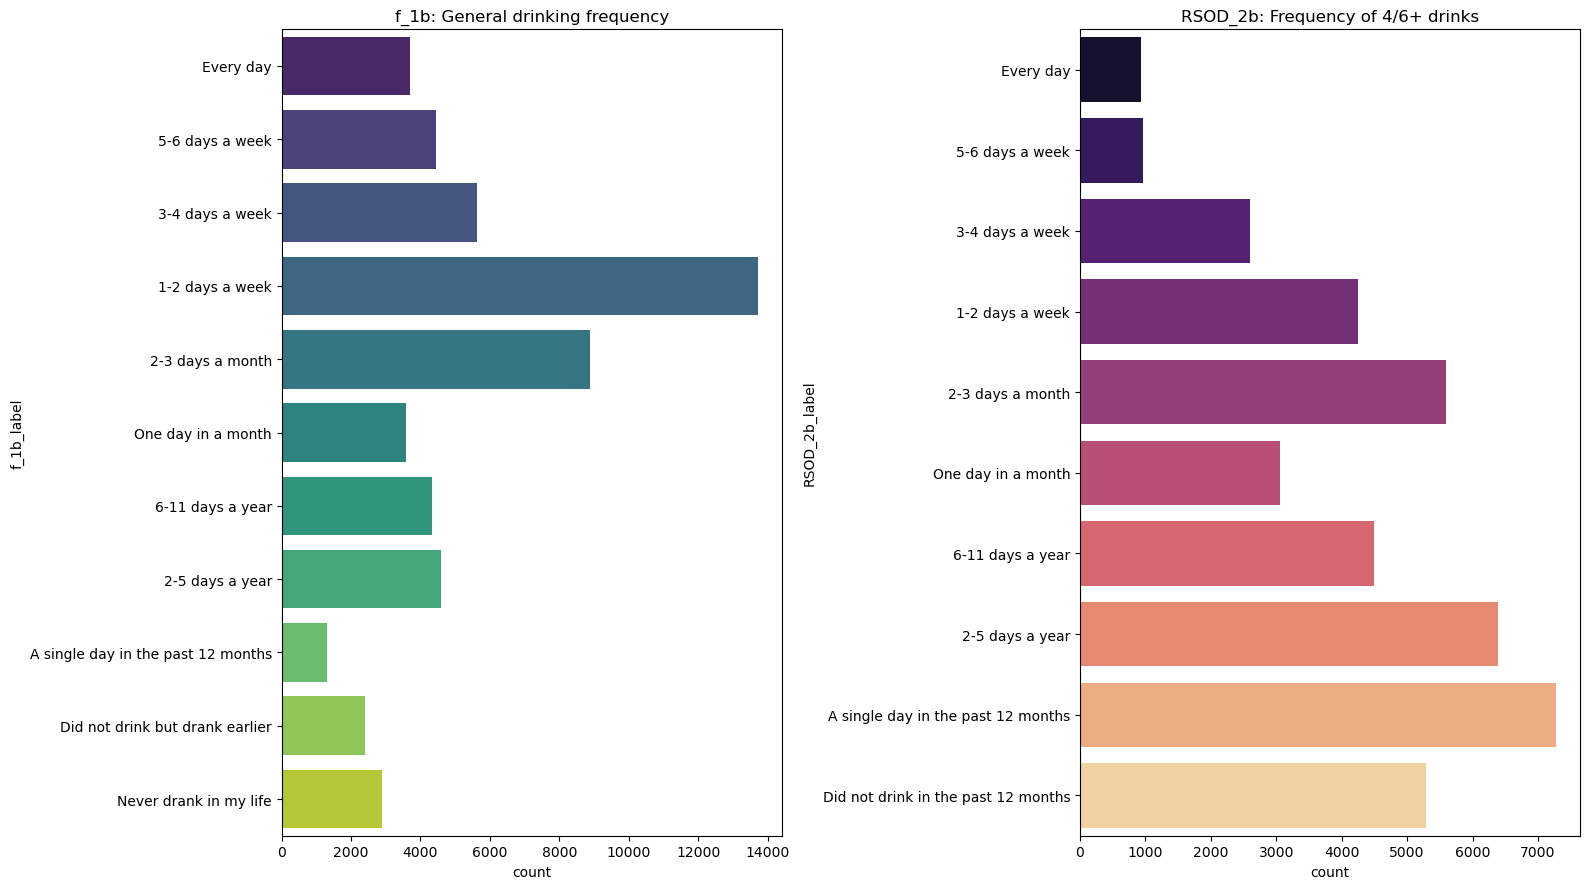

In [ ]:
#Pour voir si les autre catégories de RSOD_2b n'ont pas changé, on compare les distributions de RSOD_2b et de f_1b la fréquence de consommation d'alcool. 
#Ce ne sont pas deux variables parfaitement corrélées mais c'est le meilleur moyen auquel nous avons pensé.

# 1. On harmonise les dictionnaires pour qu'ils partagent les mêmes clés numériques
# Note : Pour RSOD_2b, on déplace le 0 vers le 10 pour l'alignement visuel
labels_f1b = {
    1: "Every day", 2: "5-6 days a week", 3: "3-4 days a week",
    4: "1-2 days a week", 5: "2-3 days a month", 6: "One day in a month",
    7: "6-11 days a year", 8: "2-5 days a year", 
    9: "A single day in the past 12 months",
    10: "Did not drink but drank earlier", 11: "Never drank in my life"
}

labels_rsod2b = {
    1: "Every day", 2: "5-6 days a week", 3: "3-4 days a week",
    4: "1-2 days a week", 5: "2-3 days a month", 6: "One day in a month",
    7: "6-11 days a year", 8: "2-5 days a year",
    9: "A single day in the past 12 months",
    10: "Did not drink in the past 12 months" # On utilise 10 ici pour l'alignement
}

# 2. Préparation des données pour l'affichage
# On crée une colonne temporaire où le 0 de RSOD_2b devient 10 juste pour afficher les deux variables avec les catégories dans le même ordre
data['RSOD_2b_temp'] = data['RSOD_2b'].replace(0, 10)

data['f_1b_label'] = data['f_1b'].map(labels_f1b)
data['RSOD_2b_label'] = data['RSOD_2b_temp'].map(labels_rsod2b)

# 3. On définit un ordre STRICT basé sur les clés 1 à 10
# Cela garantit que la ligne 1 de f_1b est en face de la ligne 1 de RSOD_2b
common_order = [
    "Every day", "5-6 days a week", "3-4 days a week", "1-2 days a week",
    "2-3 days a month", "One day in a month", "6-11 days a year",
    "2-5 days a year", "A single day in the past 12 months",
    "Did not drink in the past 12 months", # Pour RSOD
    "Did not drink but drank earlier",     # Pour f1b
    "Never drank in my life"               # Pour f1b
]

# Note: On filtre l'ordre pour chaque graphique pour ne pas afficher de barres vides
order_f1b = [l for l in common_order if l in labels_f1b.values()]
order_rsod2b = [l for l in common_order if l in labels_rsod2b.values()]


fig, axes = plt.subplots(1, 2, figsize=(16, 9), sharey=False)

# Plot f_1b
sns.countplot(y='f_1b_label', data=data, order=order_f1b, ax=axes[0], palette='viridis')
axes[0].set_title('f_1b: General drinking frequency')

# Plot RSOD_2b
sns.countplot(y='RSOD_2b_label', data=data, order=order_rsod2b, ax=axes[1], palette='magma')
axes[1].set_title('RSOD_2b: Frequency of 4/6+ drinks')

plt.tight_layout()
plt.show()

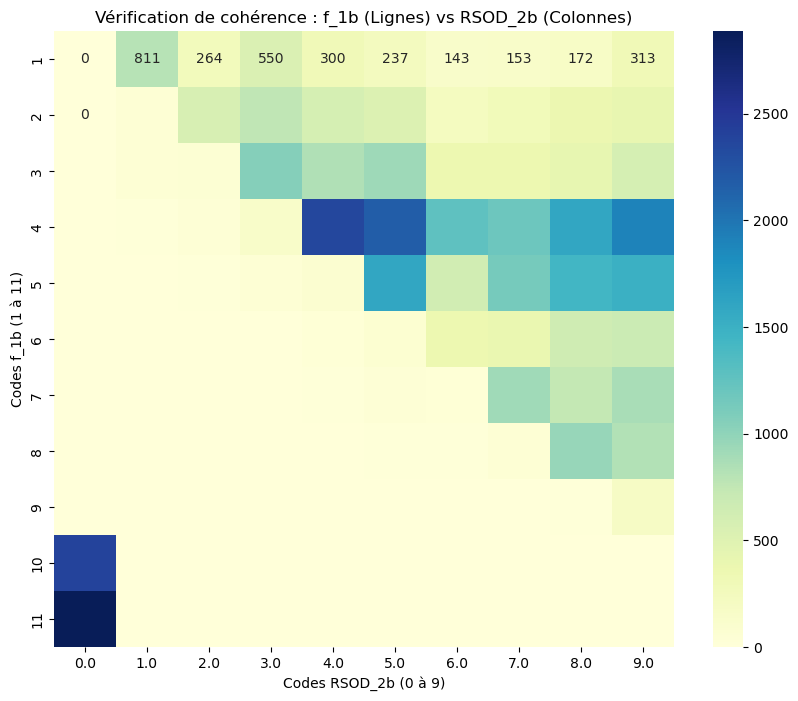

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# On crée une table de contingence (effectifs croisés)
# f_1b en lignes, RSOD_2b en colonnes
ct = pd.crosstab(data['f_1b'], data['RSOD_2b'])


plt.figure(figsize=(10, 8))
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Vérification de cohérence : f_1b (Lignes) vs RSOD_2b (Colonnes)")
plt.xlabel("Codes RSOD_2b (0 à 9)")
plt.ylabel("Codes f_1b (1 à 11)")
plt.show()

SEMBLE CONFIRMER NOTRE HYPOTHESE = Bonne distribution de RSOD_2b:
Frequency of
drinking 4/6+ (resp. 8/12+ )
drinks
- 0 = I did not drink in the past 12 months
- 1 = Every day
- 2 = 5-6 days a week
- 3 = 3-4 days a week
- 4 = 1 - 2 days a week
- 5 = 2 - 3 days a month
- 6 = One day in a month
- 7 = 6 - 11 days a year
- 8 = 2 - 5 days a year
- 9 = a single day in the past 12 months
??????? A VERIFIER EXPLIQUER TABLE DE CONTINGENCE



INTERPRETATION CHATGPT A AMELIORER Cette heatmap confirme de manière quasi-certaine votre hypothèse : le code 0 de RSOD_2b remplace bien le code 10 du codebook original, et les autres indices (1 à 9) sont restés alignés.

Voici l'analyse détaillée de votre table de contingence pour valider la cohérence :

1. La validation du "0" (Non-buveurs)
C'est le point le plus flagrant sur votre graphique :

On observe une concentration massive (bleu foncé) à l'intersection des lignes 10/11 (f_1b) et de la colonne 0 (RSOD_2b).

Interprétation : Les personnes qui déclarent ne jamais avoir bu ou ne pas avoir bu récemment (f_1b = 10 ou 11) sont toutes regroupées dans le code 0 de RSOD_2b.

Conclusion : Votre choix de labeliser 0 = I did not drink in the past 12 months est parfaitement exact.

2. La "Diagonale de Logique" (Indices 1 à 9)
Dans vos deux échelles, plus le chiffre est petit, plus la fréquence est élevée (1 = tous les jours, 9 = 1 jour par an).

Ce que l'on voit : Il n'y a quasiment aucune observation dans la zone "sud-ouest" du tableau (le triangle en bas à gauche pour les codes 1 à 9).

Pourquoi c'est bon : Cela signifie que personne n'a une fréquence de "forte consommation" (RSOD_2b) supérieure à sa fréquence de "consommation générale" (f_1b).

Exemple : Personne n'est codé f_1b = 4 (boit 1-2 fois/semaine) tout en étant RSOD_2b = 1 (boit 4+ verres tous les jours). C'est logiquement impossible, et votre table respecte cela.

3. La distribution des "Binge Drinkers"
Les points les plus denses pour les codes 1 à 9 se situent sur la diagonale ou légèrement à droite de celle-ci.

Exemple sur la ligne 4 (f_1b) : Le pic est au croisement avec la colonne 4 de RSOD_2b. Cela indique que les gens qui boivent 1 à 2 jours par semaine boivent souvent 4/6+ verres à chaque fois qu'ils consomment.

Si les codes avaient été décalés (par exemple si le 1 était devenu 2), vous verriez un décalage systématique de la diagonale, ce qui n'est pas le cas ici.

In [80]:
# On compte les NA
print(f"Nombre de NA dans RSOD_2b : {data['RSOD_2b'].isna().sum()}")

Nombre de NA dans RSOD_2b : 13059


In [ ]:
#AVANT TOUT REMPLACEMENT: le faire par pays ? : IL FAUT ABSOLUMENT VOIR SI LES NON REPONDANTS DE RSOD_2B ONT UN PROFIL PARTICULIER, EN PARTICULIER SONT ILS GROS/PETITS BUVEURS VIA bsqf__alc ?

Pour gérer les valeurs manquantes de RSOD_2b, on décide d'utiliser les variables de fréquence de consommation d'alcool par an (rf_1b) et de quantité consommée en gramme d'alcool pur (bsqf_alc).
Nous choisirons, comme les auteurs de la base le font dans leur conversions (cf. document "database guidelines"), de considérer qu'un verre d'alcool représente en moyenne 10 grammes d'alcool pur. 



#PROCHAINE ETAPE= RECONVERSION DES VALEURS MANQUANTES DE RSOD_2B A PARTIR DES AUTRES VARIABLE
0- On prend toutes les valeurs manquantes de RSOD_2b
1- diviser bsqf par masse volumique de l'alcool 0.789 kg/L
2- diviser cela par rf_1b = on obtient la consommation moyenne en gramme d'alcool par jour où on a consommé de l'alcool sur l'année passée
3- si celle-ci est inférieure à 40g (c'est à dire 4 verres), on met RSOD_2b = 0   (ATTTENTION C'EST PAS UN PEU DANGEREUX DE RAISONNER EN MOYENNE!!!! car consommateur ponctuellement élevés mal repérés)

On ne peut pas appliquer cet algorithme naïf qui réduirait la variance de consommation d'alcool des individus ayant une valeur manquante pour RSOD_2b à zéro.
Cependant, il y a deux cas de valeurs manquantes que l'on peut traiter facilement:
1) les individus qui ont consommé moins de 40g (soit 4 verres) d'alcool pur dans l'année et auxquels on peut attribuer RSOD_2b=0;
2) les individus qui ont consommé une seule fois par an plus de 40g d'alcool pur auxquels on peut attribuer RSOD_2b=9;

Pour le reste des valeurs manquantes sur cette variable, nous utiliserons la méthode d'imputation par "le plus proche voisin" après avoir sélectionner nos pays d'intérêt.

In [120]:
# 1
# On regarde le nombre d'individu qui consomme moins de 40g par an soit 4 verre d'alcool selon notre critère de conversion, 
# ceux là sont forcément dans la catégorie 0 de RSOD_2b

print(len(data.loc[data['RSOD_2b'].isna() & (data['bsqf_alc'] < 40/7.89)])) # On divise par la masse volumique de l'alcool pur en gramme/cl car bsqf_alc est en cl

#On remplace ces valeurs manquantes de RSOD_2b par 0 dans une nouvelle variable RSOD_2bcorrected
data['RSOD_2bcorrected'] =data['RSOD_2b'].copy()
data.loc[data['RSOD_2b'].isna() & (data['bsqf_alc'] < 40/7.89),'RSOD_2bcorrected'] = 0

1591


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_24460\1919886006.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RSOD_2bcorrected'] =data['RSOD_2b'].copy()


In [121]:
#2
print(len(data.loc[data['RSOD_2bcorrected'].isna() & (data['bsqf_alc'] > 40/7.89) & (data['f_1b']==9)]))
data.loc[data['RSOD_2bcorrected'].isna() & (data['bsqf_alc'] > 40/7.89) & (data['f_1b']==9),'RSOD_2bcorrected'] = 9

146


In [94]:
data.columns

Index(['COUNTRY', 'SD_1', 'SD_2', 'SD_4', 'SD_6', 'SD_7', 'SD_8', 'SD_9',
       'SD_10', 'sd_20month', 'Demo_Empl', 'social_class', 'bsqf_alc', 'f_1b',
       'RSOD_5a', 'RSOD_5b', 'RSOD_5c', 'cbsqf_beer', 'cbsqf_spir',
       'cbsqf_wine', 'RSOD_5d', 'RSOD_2b', 'RSOD_7b', 'CH_1', 'WB_1', 'WB_2',
       'WB_3', 'RSOD_2bcorrect', 'f1b_days_max', 'alc_per_drinking_day',
       'RSOD_2bcorrected'],
      dtype='object')

<Axes: >

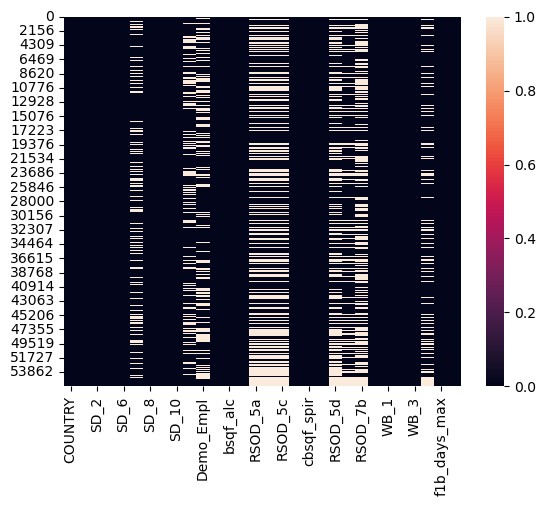

In [89]:
sns.heatmap(data.isna())

Il est important de traiter le cas de la variable salaire sd_20month, car les facteurs économiques jouent, selon la littérature, un rôle important dans la consommation d'alcool (les plus favorisés auraient tendance à consommer plus régulièrement de l'alcool notamment). Le salaire étant la seule variable quantitative indiquant la situation économique des individus que nous ayont, nous devons traiter le problème de valeur manquante sur cette variable.

In [ ]:
missing_by_country = data.groupby('COUNTRY').apply(lambda x: x.isna().mean()) #on le remet car data a changé 
missing_by_country['sd_20month']
observation_count = data.groupby('COUNTRY').size()

# Ajouter le nombre d'observation par pays
missing_by_country['Observation_Count'] = observation_count

print(missing_by_country.loc[:, ["sd_20month", "Observation_Count"]])

                   sd_20month  Observation_Count
COUNTRY                                         
Austria              0.262257               3039
Belgium              0.251678               1490
BosniaHerzegovina    0.146015               1493
Bulgaria             0.208139               2998
Catalunya            0.295728               1498
Croatia              0.223632               1498
Cyprus               0.156691               1487
Czech Republic       0.168343               1491
Denmark              0.245198               1562
Estonia              0.524476               2145
Finland              0.166334               1503
France               0.128725               1678
Germany              0.153220               1475
Greece               0.230263               1520
Hungary              0.174987               1983
Iceland              0.094810               1445
Ireland              0.215962               1491
Italy                0.210280               1498
Latvia              

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_18040\1508566044.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_country = data.groupby('COUNTRY').apply(lambda x: x.isna().mean()) #on le remet car data a changé


Tous les pays ont un nombre conséquent d'observations (+de 1400). Nous obtiendrions donc des résultats statistiquements significatifs avec l'étude de chacun d'eux, ça n'est donc pas un critère pour sélectionner quel pays nous allons étudier.
Ils ont cependant des ratio de valeurs manquantes différents pour la variable salaire mensuelle sd_month, ce qui représentera un critère de sélection.

In [ ]:
"""## --- B. Premiers Tri-à-Plat (Distributions) ---
print("\n" + "="*50)
print("B. TRI-À-PLAT ET DISTRIBUTIONS UNIDIMENSIONNELLES")
print("="*50)

# Sélection des variables continues et catégorielles pour des analyses séparées
vars_continues = ['SD_2', 'SD_7', 'sd_20month', 'bsqf_alc', 'f_1b', 'RSOD_2b', 'RSOD_7b']
vars_categorielles = [v for v in data1.columns if v not in vars_continues]

# 1. Variables Catégorielles
print("\n--- Variables Catégorielles ---")
for col in vars_categorielles:
    if col in data1.columns:
        # Affichage des fréquences
        print(f"\n--- {col} ---")
        print(data1[col].value_counts(dropna=False, normalize=True).mul(100).round(2).astype(str) + '%')

        # Visualisation des distributions (Histogrammes ou Bar plots)         plt.figure(figsize=(8, 4))
        sns.countplot(y=data1[col], order=data1[col].value_counts().index, palette='pastel')
        plt.title(f'Distribution de {col}')
        plt.show()


# 2. Variables Continues
print("\n--- Variables Continues (Statistiques Descriptives) ---")
if any(v in data1.columns for v in vars_continues):
    print(data1[vars_continues].describe().T)

# Visualisation des distributions (Box plots et Histograms)     for col in [v for v in vars_continues if v in data1.columns]:
plt.figure(figsize=(12, 4))
        
plt.subplot(1, 2, 1)
sns.histplot(data1[col].dropna(), kde=True, bins=30, color='skyblue')
plt.title(f'Histogramme de {col}')
        
plt.subplot(1, 2, 2)
sns.boxplot(x=data1[col].dropna(), color='salmon')
plt.title(f'Boxplot de {col}')
        
plt.tight_layout()
plt.show()"""

'## --- B. Premiers Tri-à-Plat (Distributions) ---\nprint("\n" + "="*50)\nprint("B. TRI-À-PLAT ET DISTRIBUTIONS UNIDIMENSIONNELLES")\nprint("="*50)\n\n# Sélection des variables continues et catégorielles pour des analyses séparées\nvars_continues = [\'SD_2\', \'SD_7\', \'sd_20month\', \'bsqf_alc\', \'f_1b\', \'RSOD_2b\', \'RSOD_7b\']\nvars_categorielles = [v for v in data1.columns if v not in vars_continues]\n\n# 1. Variables Catégorielles\nprint("\n--- Variables Catégorielles ---")\nfor col in vars_categorielles:\n    if col in data1.columns:\n        # Affichage des fréquences\n        print(f"\n--- {col} ---")\n        print(data1[col].value_counts(dropna=False, normalize=True).mul(100).round(2).astype(str) + \'%\')\n\n        # Visualisation des distributions (Histogrammes ou Bar plots)         plt.figure(figsize=(8, 4))\n        sns.countplot(y=data1[col], order=data1[col].value_counts().index, palette=\'pastel\')\n        plt.title(f\'Distribution de {col}\')\n        plt.show()\

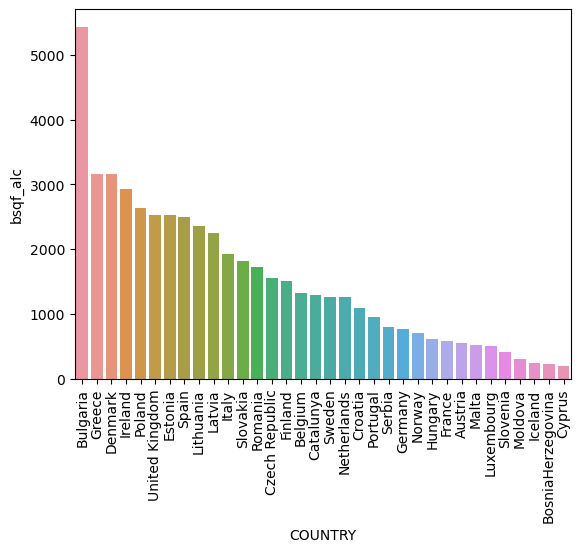

In [ ]:
datalc= data.groupby('COUNTRY')['bsqf_alc'].mean().sort_values(ascending=False)

#diagramme de la moyenne de consommation d'alcool par pays (en cl d'alcool pur par an)
datalc = datalc.reset_index()
sns.barplot(x='COUNTRY', y='bsqf_alc', data=datalc)
plt.xticks(rotation=90)
plt.show()

In [ ]:
world['NAME'].unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

In [ ]:
data['COUNTRY'].unique()

array(['United Kingdom', 'Lithuania', 'Romania', 'Portugal', 'Germany',
       'Estonia', 'Belgium', 'Serbia', 'Hungary', 'Netherlands', 'Spain',
       'Denmark', 'Finland', 'Norway', 'Italy', 'Catalunya', 'Slovenia',
       'Austria', 'France', 'Slovakia', 'Greece', 'Sweden', 'Latvia',
       'Bulgaria', 'Croatia', 'Ireland', 'Poland', 'Luxembourg',
       'Czech Republic', 'Malta', 'Iceland', 'Moldova',
       'BosniaHerzegovina', 'Cyprus'], dtype=object)

In [142]:


# 1. Calcul de la consommation moyenne par pays
# On s'assure d'avoir les noms de pays dans le dataframe
#data['COUNTRY'] = data['COUNTRY'].map(country_mapping)
stats_pays = data.groupby('COUNTRY')['bsqf_alc'].mean().reset_index()

# 2. Chargement du fond de carte
world = gpd.read_file(r"C:\Users\Utilisateur\Documents\École\S1\python\110m_cultural\ne_110m_admin_0_countries.shp")

# 3. Fusion des données (Merge)
# Note : Vérifiez que les noms dans country_mapping correspondent à ceux de 'name' dans world
europe = world[world['CONTINENT'] == 'Europe']
map_data = europe.merge(stats_pays, left_on='NAME', right_on='COUNTRY', how='left')


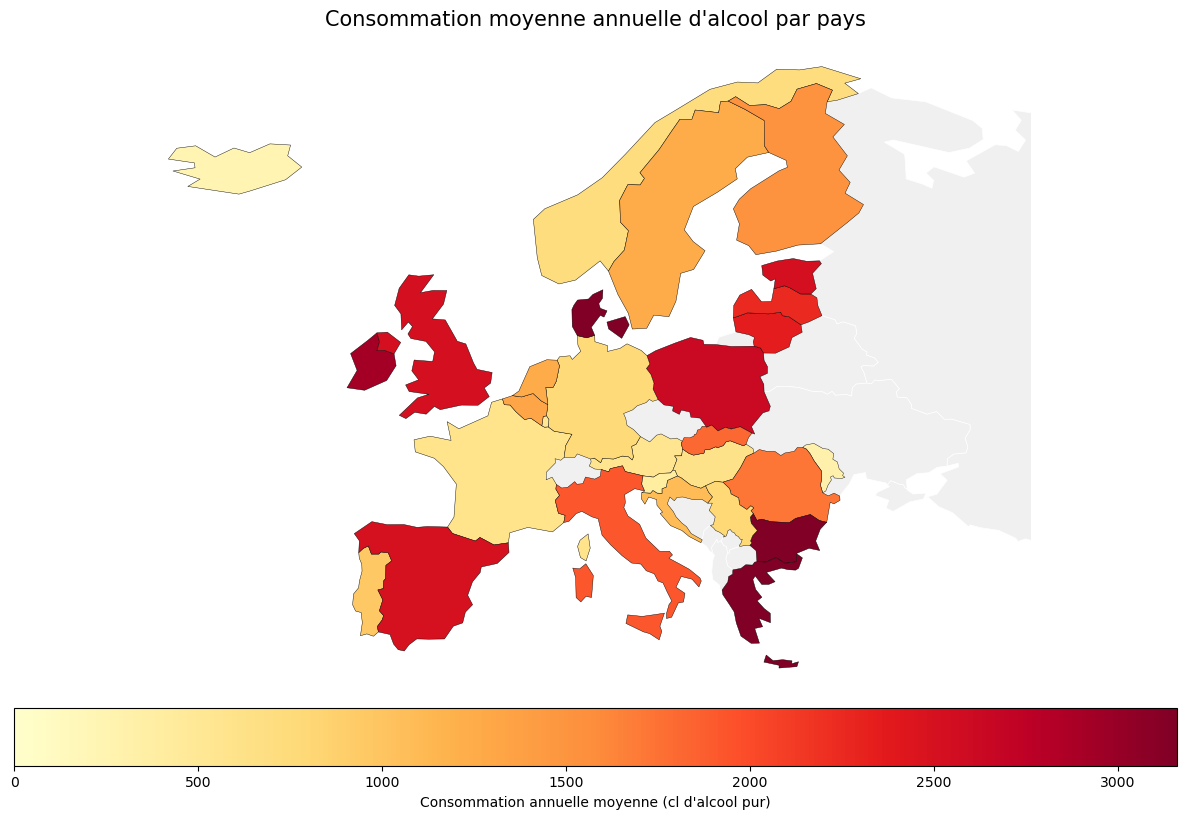

In [143]:
import matplotlib.pyplot as plt

# 1. Préparation des statistiques
stats_pays = data.groupby('COUNTRY')['bsqf_alc'].mean().reset_index()

# 2. Fusion des données
map_data = europe.merge(stats_pays, left_on='NAME', right_on='COUNTRY', how='left')

# 3. Affichage de la carte
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Fond de l'Europe en gris très clair
europe.plot(ax=ax, color="#f0f0f0", edgecolor='white', linewidth=0.5)

# Calcul manuel du max pour le gradient (ou fixez-le pour accentuer le contraste)
# Si vous voulez que les différences sautent aux yeux, vous pouvez réduire vmax
val_max = map_data['bsqf_alc'].quantile(0.95) # On sature à 95% pour que le rouge soit plus présent

# On trace les données
map_data.dropna(subset=['bsqf_alc']).plot(
    column='bsqf_alc', 
    ax=ax, 
    legend=True,
    # 'YlOrRd' offre un spectre plus large que 'OrRd' (du jaune au rouge foncé)
    cmap='YlOrRd', 
    vmin=0, 
    vmax=val_max, # Accentue le contraste sur les pays restants
    legend_kwds={
        'label': "Consommation annuelle moyenne (cl d'alcool pur)", 
        'orientation': "horizontal",
        'pad': 0.01
    },
    edgecolor='black',
    linewidth=0.3
)

# Ajustement vue Europe
ax.set_xlim(-25, 45)
ax.set_ylim(33, 72)
ax.set_title("Consommation moyenne annuelle d'alcool par pays", fontsize=15, pad=20)
ax.axis('off')

plt.show()

In [129]:
data.groupby('COUNTRY')['bsqf_alc'].mean().sort_values(ascending=True)

COUNTRY
Cyprus                205.198107
BosniaHerzegovina     236.640506
Iceland               242.589647
Moldova               300.142423
Slovenia              406.714585
Luxembourg            510.276905
Malta                 514.330204
Austria               548.083531
France                585.695441
Hungary               609.769031
Norway                703.774055
Germany               773.758070
Serbia                794.984060
Portugal              950.801565
Croatia              1094.511644
Netherlands          1264.307564
Sweden               1265.684537
Catalunya            1300.424266
Belgium              1319.344460
Finland              1514.336666
Czech Republic       1549.297912
Romania              1724.810394
Slovakia             1813.477194
Italy                1924.703092
Latvia               2250.058178
Lithuania            2349.951613
Spain                2500.592609
Estonia              2526.571155
United Kingdom       2530.450822
Poland               2627.596199
Ir

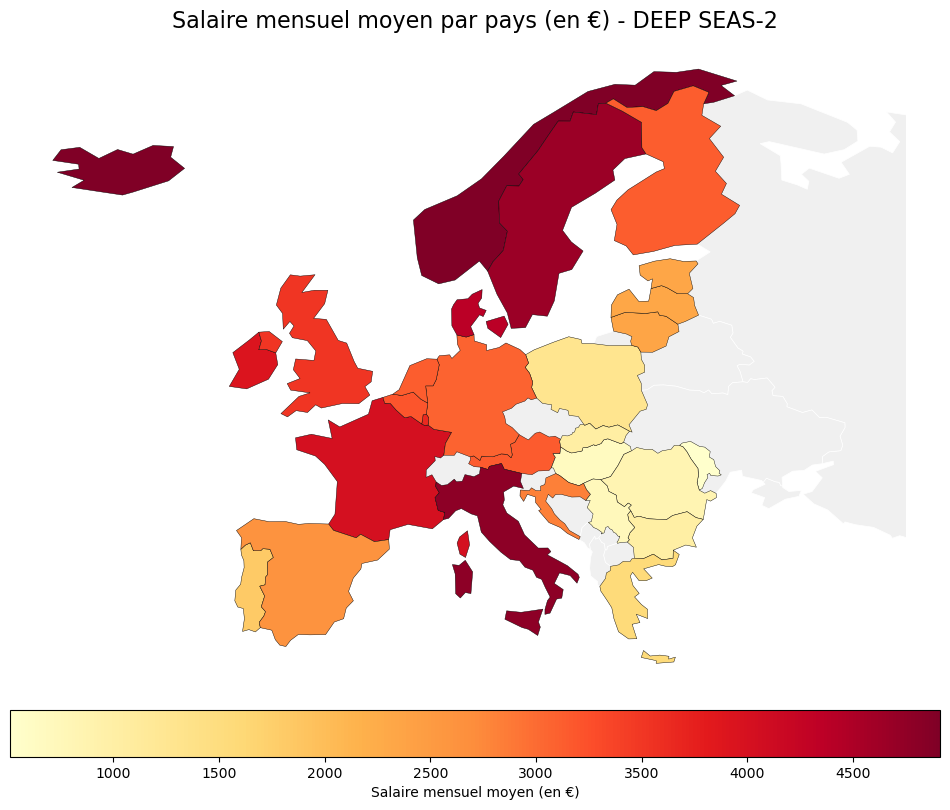

In [148]:
import matplotlib.pyplot as plt

# 1. Calcul de la moyenne par pays
stats_pays = data.groupby('COUNTRY')['sd_20month_EUR_2020'].mean().reset_index()

# 2. Fusion avec le fond de carte
# Assurez-vous que 'europe' est déjà défini comme dans votre code précédent
map_data = europe.merge(stats_pays, left_on='NAME', right_on='COUNTRY', how='left')

# 3. Affichage de la carte
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Fond de carte neutre pour les pays sans données
europe.plot(ax=ax, color='#f0f0f0', edgecolor='white', linewidth=0.5)

# Pour booster le gradient, on définit vmax au 95ème percentile 
# Cela évite qu'un pays avec un salaire très élevé n'écrase les nuances des autres
vmax_salaire = map_data['sd_20month_EUR_2020'].quantile(0.95)
vmin_salaire = map_data['sd_20month_EUR_2020'].min()

# Affichage des données
map_data.dropna(subset=['sd_20month_EUR_2020']).plot(
    column='sd_20month_EUR_2020', 
    ax=ax, 
    legend=True,
    cmap='YlOrRd', # Palette Jaune -> Vert -> Bleu (très contrastée)
    vmin=vmin_salaire,
    vmax=vmax_salaire,
    legend_kwds={
        'label': "Salaire mensuel moyen (en €)", 
        'orientation': "horizontal",
        'pad': 0.02,
        'shrink': 0.8
    },
    edgecolor='black',
    linewidth=0.3
)

# Ajustements géographiques
ax.set_xlim(-25, 45)
ax.set_ylim(33, 72)
ax.set_title("Salaire mensuel moyen par pays (en €) - DEEP SEAS-2", fontsize=16, pad=20)
ax.axis('off')

plt.show()

Refaire une autre carte ou prendre sur internet pour critiquer distribution ici avec d'autres données.

In [98]:
data_na = data.copy()
data_na['sd_20month_EUR_2020'] = data_na['sd_20month_EUR_2020'].isna()
data_na.head()

,COUNTRY,SD_1,SD_2,SD_4,SD_6,SD_7,SD_8,SD_9,SD_10,sd_20month,...,CH_1,WB_1,WB_2,WB_3,RSOD_2bcorrect,f1b_days_max,alc_per_drinking_day,RSOD_2bcorrected,EXCHANGE_RATE_TO_EUR,sd_20month_EUR_2020
0,United Kingdom,1,61,1,2,0.0,4,3,2,666.666667,...,1,3,2,1,NaN,12,10.837500,NaN,1.184834,False
1,United Kingdom,1,37,4,1,NaN,3,2,1,2083.333333,...,1,3,4,5,3.0,312,16.967500,3.0,1.184834,False
2,Lithuania,1,42,1,2,2.0,4,4,1,1500.000000,...,1,2,2,2,0.0,0,0.000000,0.0,1.000000,False
3,Lithuania,1,37,3,1,NaN,4,2,1,1500.000000,...,1,3,3,2,2.0,312,22.352244,2.0,1.000000,False
4,Lithuania,2,60,4,1,NaN,2,3,2,1500.000000,...,1,3,2,2,8.0,36,1.720833,8.0,1.000000,False


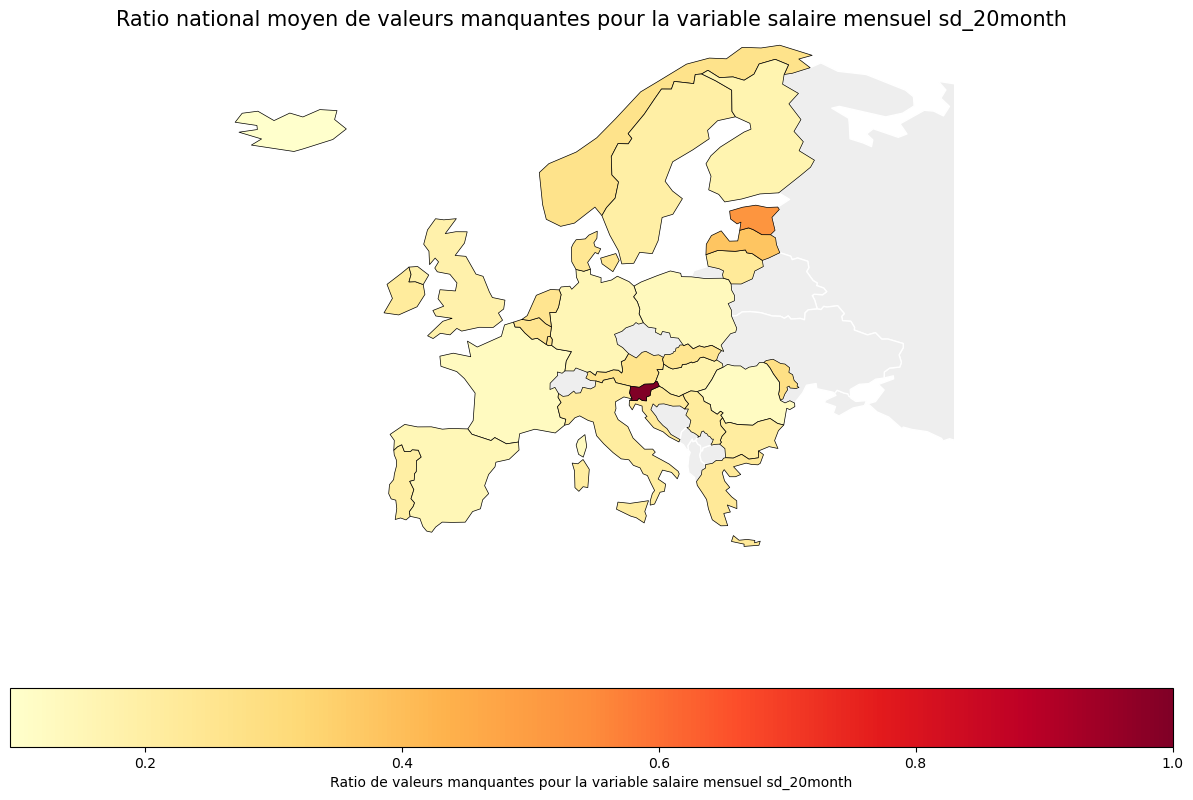

In [158]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Calcul de la consommation moyenne par pays
# On s'assure d'avoir les noms de pays dans le dataframe
#data['COUNTRY'] = data['COUNTRY'].map(country_mapping)
stats_pays = data_na.groupby('COUNTRY')['sd_20month_EUR_2020'].mean().reset_index()

# 2. Chargement du fond de carte
world = gpd.read_file(r"C:\Users\Utilisateur\Documents\École\S1\python\110m_cultural\ne_110m_admin_0_countries.shp")

# 3. Fusion des données (Merge)
# Note : Vérifiez que les noms dans country_mapping correspondent à ceux de 'name' dans world
europe = world[world['CONTINENT'] == 'Europe']
map_data = europe.merge(stats_pays, left_on='NAME', right_on='COUNTRY', how='left')

# 4. Affichage de la carte
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# On trace le fond de l'Europe en gris (pour les pays sans données)
europe.plot(ax=ax, color='#eeeeee', edgecolor='white')

# On trace les données de consommation
map_data.dropna(subset=['sd_20month_EUR_2020']).plot(
    column='sd_20month_EUR_2020', 
    ax=ax, 
    legend=True,
    legend_kwds={'label': "Ratio de valeurs manquantes pour la variable salaire mensuel sd_20month", 'orientation': "horizontal"},
    cmap='YlOrRd', # Dégradé Orange/Rouge
    edgecolor='black',
    linewidth=0.5
    
)

# Ajustement pour centrer sur l'Europe
ax.set_xlim(-25, 45)
ax.set_ylim(33, 72)
ax.set_title("Ratio national moyen de valeurs manquantes pour la variable salaire mensuel sd_20month", fontsize=15)
ax.axis('off')

plt.show()

In [26]:
data_na.groupby('COUNTRY')['sd_20month_EUR_2020'].mean().sort_values(ascending=True)

COUNTRY
Iceland              0.093333
Romania              0.122340
France               0.129977
Poland               0.134615
BosniaHerzegovina    0.146000
Spain                0.149849
Germany              0.153642
Cyprus               0.156000
Finland              0.166334
Czech Republic       0.168554
Hungary              0.176705
United Kingdom       0.181939
Malta                0.188667
Sweden               0.196560
Portugal             0.200399
Bulgaria             0.208652
Italy                0.211436
Serbia               0.214381
Ireland              0.215190
Croatia              0.223036
Lithuania            0.225445
Greece               0.230618
Denmark              0.247312
Slovakia             0.249834
Netherlands          0.253324
Belgium              0.253324
Luxembourg           0.254980
Austria              0.265267
Norway               0.268000
Moldova              0.280000
Catalunya            0.297493
Latvia               0.378324
Estonia              0.526657
Sl

In [122]:
data_na_rsod= data.copy()
data_na_rsod['RSOD_2bcorrected']= data['RSOD_2bcorrected'].isna()
data_na_rsod.groupby('COUNTRY')['RSOD_2bcorrected'].mean().sort_values(ascending=True)

COUNTRY
Finland              0.092482
Bulgaria             0.095507
Poland               0.098718
Ireland              0.121919
Estonia              0.121929
Latvia               0.133644
Czech Republic       0.137242
Croatia              0.149134
Greece               0.156373
Norway               0.163333
Sweden               0.168305
Slovakia             0.180731
Serbia               0.186418
Lithuania            0.187871
Belgium              0.192154
United Kingdom       0.207171
Austria              0.239742
Romania              0.244681
Germany              0.247682
Hungary              0.258337
Denmark              0.262492
Netherlands          0.264628
Malta                0.266000
Italy                0.267287
Slovenia             0.284764
Spain                0.287009
Portugal             0.291611
Catalunya            0.314644
Iceland              0.324000
France               0.395785
Moldova              0.418000
Luxembourg           0.419655
BosniaHerzegovina    0.430667
Cy

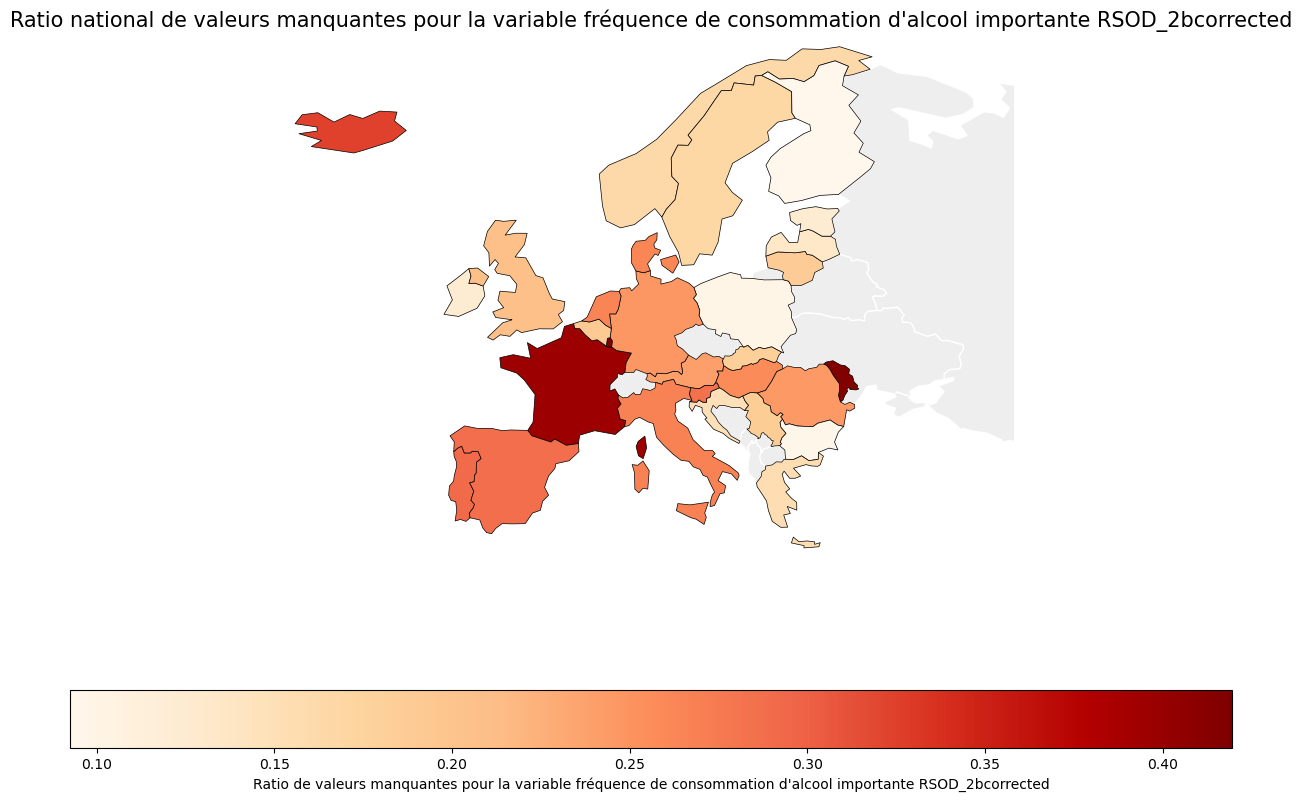

In [127]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Calcul de la consommation moyenne par pays
# On s'assure d'avoir les noms de pays dans le dataframe
#data['COUNTRY'] = data['COUNTRY'].map(country_mapping)
stats_pays = data_na_rsod.groupby('COUNTRY')['RSOD_2bcorrected'].mean().reset_index()

# 2. Chargement du fond de carte
world = gpd.read_file(r"C:\Users\Utilisateur\Documents\École\S1\python\110m_cultural\ne_110m_admin_0_countries.shp")

# 3. Fusion des données (Merge)
# Note : Vérifiez que les noms dans country_mapping correspondent à ceux de 'name' dans world
europe = world[world['CONTINENT'] == 'Europe']
map_data = europe.merge(stats_pays, left_on='NAME', right_on='COUNTRY', how='left')

# 4. Affichage de la carte
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# On trace le fond de l'Europe en gris (pour les pays sans données)
europe.plot(ax=ax, color='#eeeeee', edgecolor='white')

# On trace les données de consommation
map_data.dropna(subset=['RSOD_2bcorrected']).plot(
    column='RSOD_2bcorrected', 
    ax=ax, 
    legend=True,
    legend_kwds={'label': "Ratio de valeurs manquantes pour la variable fréquence de consommation d'alcool importante RSOD_2bcorrected", 'orientation': "horizontal"},
    cmap='OrRd', # Dégradé Orange/Rouge
    edgecolor='black',
    linewidth=0.5
)

# Ajustement pour centrer sur l'Europe
ax.set_xlim(-25, 45)
ax.set_ylim(33, 72)
ax.set_title("Ratio national de valeurs manquantes pour la variable fréquence de consommation d'alcool importante RSOD_2bcorrected", fontsize=15)
ax.axis('off')

plt.show()

In [ ]:
quantitatives = ["SD_2", "SD_7", "sd_20month", "bsqf_alc", "rf_1b", "RSOD_2b", "RSOD_7b"]
quanti = data[quantitatives]
quali = data.drop(columns=quantitatives)
quanti

,SD_2,SD_7,sd_20month,bsqf_alc,rf_1b,RSOD_2b,RSOD_7b
0,61.0,0,666.666667,130.050,12,NaN,NaN
1,37.0,NaN,2083.333333,5293.860,286,3,3
2,42.0,2,1500.000000,0.000,0,0,0
3,37.0,NaN,1500.000000,6973.900,286,2,2
4,60.0,NaN,1500.000000,61.950,30,8,8
...,...,...,...,...,...,...,...
56009,41.0,0,3500.000000,359.400,78,4,4
56010,29.0,0,2500.000000,1239.600,286,8,8
56011,30.0,0,2000.000000,8.575,"3,5",NaN,NaN
56012,32.0,1,1000.000000,329.460,30,8,NaN


In [ ]:
for i in len(data):
    if data["rrsod_7b"]

In [ ]:
data[data["rrsod_2b"] == data["rrsod_7b"] ].describe()

,COUNTRY,SD_1,SD_2,SD_4,SD_6,SD_7,SD_8,SD_9,SD_10,Demo_Empl,social_class,RSOD_5a,RSOD_5b,RSOD_5c,RSOD_5d,CH_1,WB_1,WB_2,WB_3
count,30536.000000,30536.000000,30536.000000,30536.000000,30536.000000,23829.000000,30536.000000,30536.000000,30536.000000,20046.000000,30536.000000,10199.000000,10199.000000,10199.000000,10199.000000,30536.000000,30536.000000,30536.000000,30536.000000
mean,25.519747,1.518339,41.030980,2.043719,1.780358,0.712619,2.603746,3.068706,1.343529,1.232216,4.692658,3.000196,3.623689,3.877635,4.125895,1.750491,2.146319,2.187942,1.949044
std,10.017797,0.503003,12.950805,1.208163,0.414011,0.956631,1.243886,0.949552,0.474894,0.481436,3.271586,1.088098,0.970931,1.055867,1.057772,0.482067,0.877912,0.949216,0.829983
min,10.000000,1.000000,18.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,16.000000,1.000000,30.000000,1.000000,2.000000,0.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,4.000000,1.000000,2.000000,2.000000,1.000000
50%,25.000000,2.000000,41.000000,1.000000,2.000000,0.000000,2.000000,3.000000,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000
75%,34.000000,2.000000,52.000000,3.000000,2.000000,1.000000,3.000000,4.000000,2.000000,1.000000,9.000000,4.000000,4.000000,5.000000,5.000000,2.000000,3.000000,3.000000,2.000000
max,43.000000,3.000000,64.000000,5.000000,2.000000,12.000000,5.000000,5.000000,2.000000,3.000000,9.000000,5.000000,5.000000,5.000000,5.000000,3.000000,6.000000,6.000000,6.000000


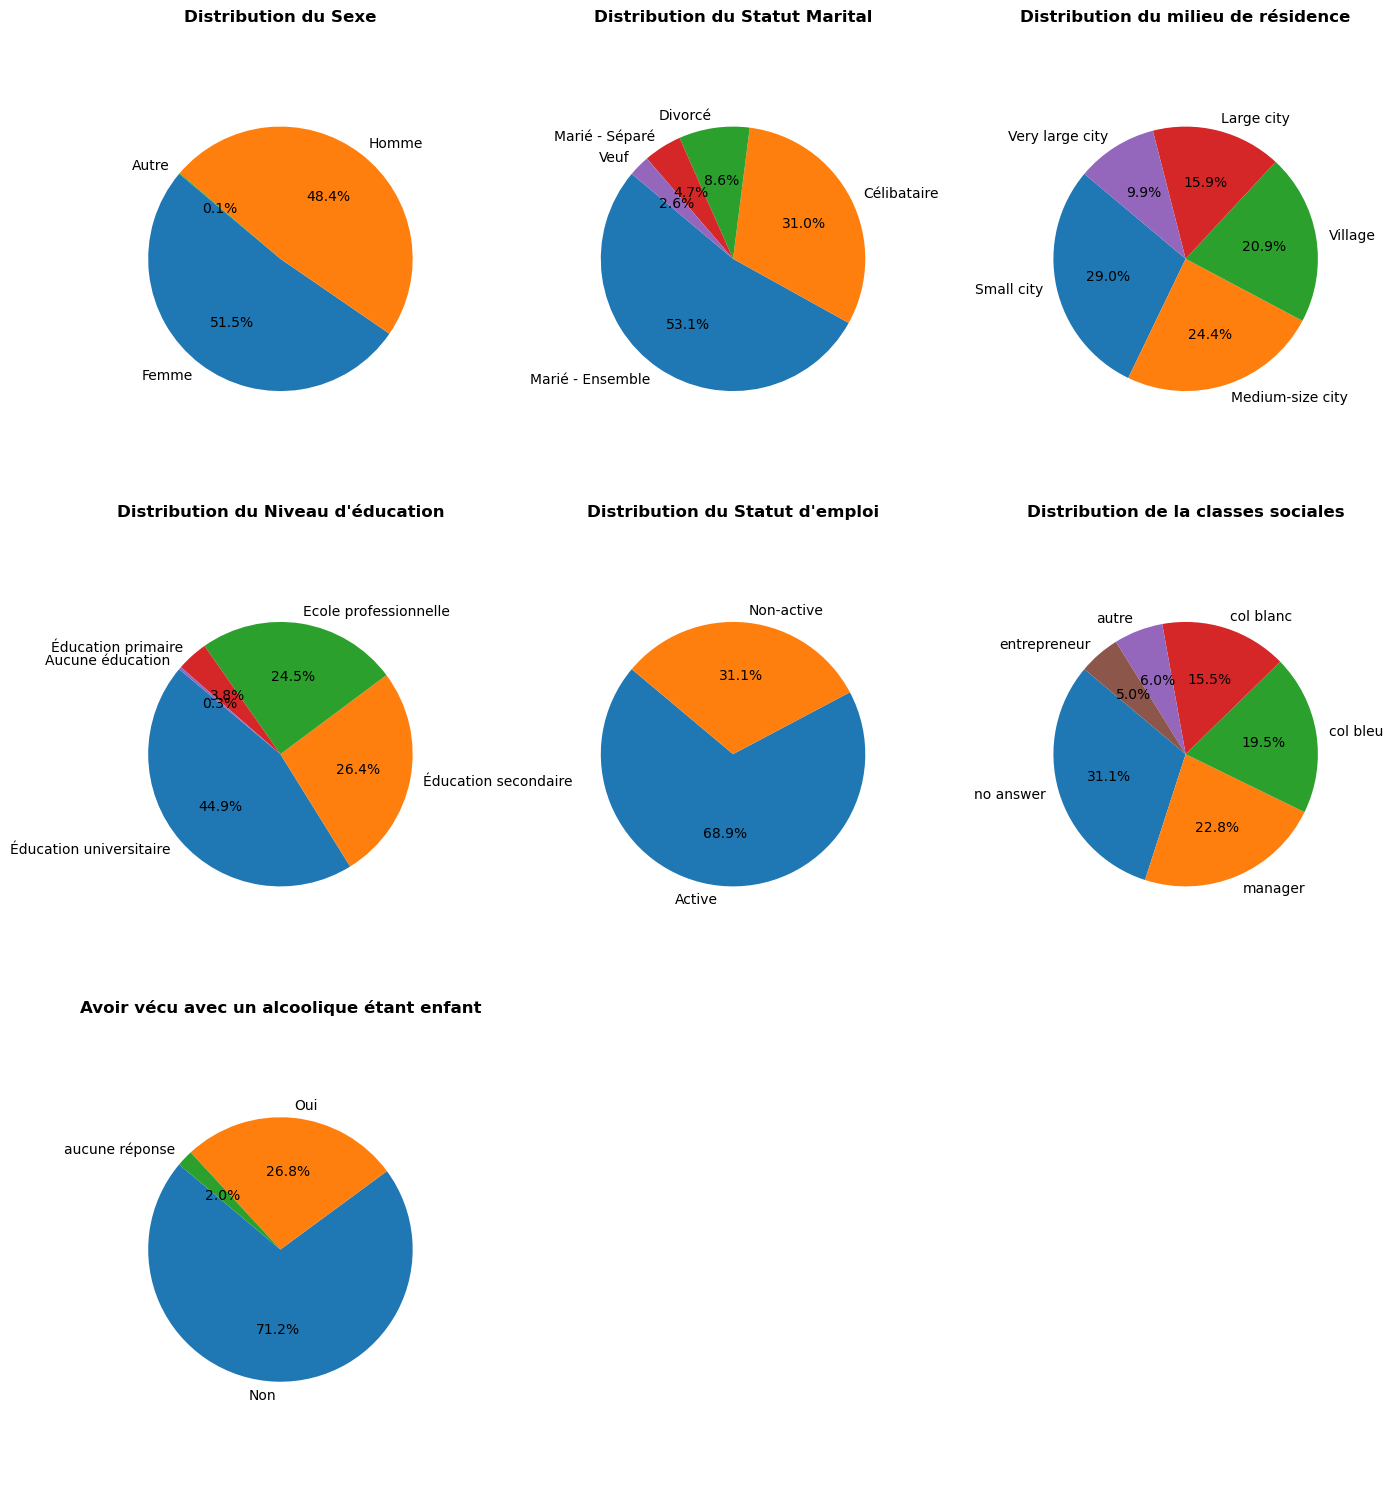

In [ ]:
# Diagramme circulaire de certaines variables qualitatives

qualitative = ["SD_1", "SD_4", "SD_8", "SD_9", "SD_10", "social_class", "CH_1"]
n_cols = 3
n_rows = (len(qualitative) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5*n_rows))
axes = axes.flatten()

# Sexe (SD_1)
counts = data["SD_1"].value_counts()
etiquettes_SD1 = {1: 'Homme', 2: 'Femme', 3: 'Autre'}
labels_SD1 = [etiquettes_SD1.get(x, x) for x in counts.index]
axes[0].pie(counts, labels=labels_SD1, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Distribution du Sexe', fontsize=12, fontweight='bold')
axes[0].axis('equal')

# Statut marital (SD_4)
counts = data["SD_4"].value_counts()
etiquettes_SD4 = {
    1: 'Marié - Ensemble',
    2: 'Marié - Séparé',
    3: 'Célibataire',
    4: 'Divorcé',
    5: 'Veuf'
}
labels_SD4 = [etiquettes_SD4.get(x, x) for x in counts.index]
axes[1].pie(counts, labels=labels_SD4, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Distribution du Statut Marital', fontsize=12, fontweight='bold')
axes[1].axis('equal')

# Type de résidence (SD_8)
counts = data["SD_8"].value_counts()
etiquettes_SD8 = {
    1: 'Village',
    2: 'Small city',
    3: 'Medium-size city',
    4: 'Large city',
    5: 'Very large city'
}
labels_SD8 = [etiquettes_SD8.get(x, x) for x in counts.index]
axes[2].pie(counts, labels=labels_SD8, autopct='%1.1f%%', startangle=140)
axes[2].set_title('Distribution du milieu de résidence', fontsize=12, fontweight='bold')
axes[2].axis('equal')

# Niveux d'éducation (SD_9)
counts = data["SD_9"].value_counts()
etiquettes_SD9 = {
    1: 'Éducation primaire',
    2: 'Éducation secondaire',
    3: 'Ecole professionnelle',
    4: 'Éducation universitaire',
    5: 'Aucune éducation'
}

labels_SD9 = [etiquettes_SD9.get(x, x) for x in counts.index]
axes[3].pie(counts, labels=labels_SD9, autopct='%1.1f%%', startangle=140)
axes[3].set_title('Distribution du Niveau d\'éducation', fontsize=12, fontweight='bold')
axes[3].axis('equal')

# statut d'emploi (SD_10)
counts = data["SD_10"].value_counts()
etiquettes_SD10 = {
    1: 'Active',
    2: 'Non-active'
}
labels_SD10 = [etiquettes_SD10.get(x, x) for x in counts.index]
axes[4].pie(counts, labels=labels_SD10, autopct='%1.1f%%', startangle=140)
axes[4].set_title('Distribution du Statut d\'emploi', fontsize=12, fontweight='bold')
axes[4].axis('equal')

# social_class
counts = data["social_class"].value_counts()
etiquettes_social_class = {    
    1: 'col bleu',
    2: 'col blanc',
    3: 'manager',
    4: 'entrepreneur',
    5: 'autre',
    9: 'no answer'
}
labels_social_class = [etiquettes_social_class.get(x, x) for x in counts.index]
axes[5].pie(counts, labels=labels_social_class, autopct='%1.1f%%', startangle=140)
axes[5].set_title('Distribution de la classes sociales', fontsize=12, fontweight='bold')
axes[5].axis('equal')

# avoir vecu avec un alcoolique (CH_1)
counts = data["CH_1"].value_counts()   
etiquettes_CH1 = {
    1: 'Oui',
    2: 'Non',
    3: 'aucune réponse'
}
labels_CH1 = [etiquettes_CH1.get(x, x) for x in counts.index]         
axes[6].pie(counts, labels=labels_CH1, autopct='%1.1f%%', startangle=140)
axes[6].set_title('Avoir vécu avec un alcoolique étant enfant', fontsize=12, fontweight='bold')
axes[6].axis('equal')



# Masquer les subplots inutilisés
for idx in range(len(qualitative), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

c:\Users\Utilisateur\Documents\Téléchargements\Anaconda\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


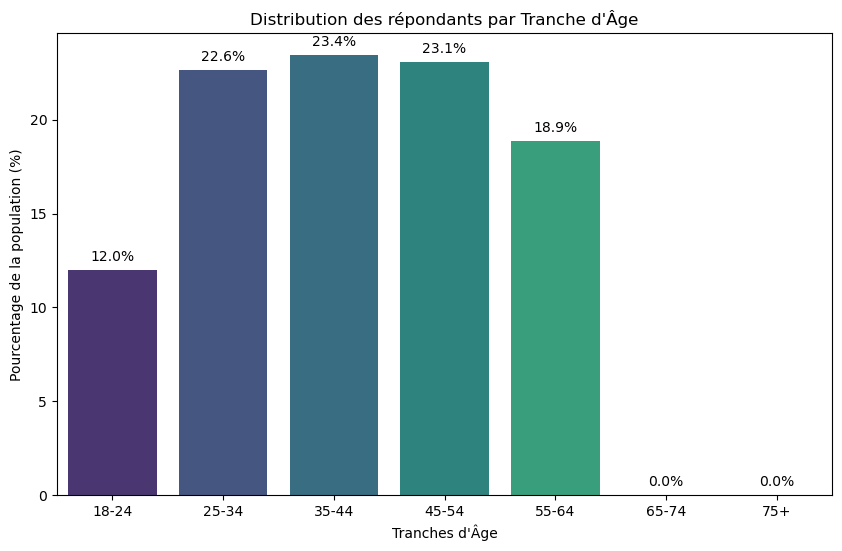


Distribution par Tranche d'Âge (en %):
Age_Tranche
18-24    12.0%
25-34    22.6%
35-44    23.4%
45-54    23.1%
55-64    18.9%
65-74     0.0%
75+       0.0%
Name: proportion, dtype: object


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Création de la variable de tranches d'âge ---
bins = [18, 25, 35, 45, 55, 65, 75, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']

data['Age_Tranche'] = pd.cut(
    data['SD_2'],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True
)

# --- 2. Préparation des données pour le Barplot (Pourcentages) ---
age_distribution = data['Age_Tranche'].value_counts(normalize=True).mul(100).sort_index()

# --- 3. Création du Barplot ---
plt.figure(figsize=(10, 6))

sns.barplot(
    x=age_distribution.index,
    y=age_distribution.values,
    palette='viridis'
)

plt.title('Distribution des répondants par Tranche d\'Âge')
plt.xlabel('Tranches d\'Âge')
plt.ylabel('Pourcentage de la population (%)')

# Ajout des pourcentages au-dessus des barres
for index, value in enumerate(age_distribution.values):
    plt.text(index, value + 0.5, f'{value:.1f}%', ha='center')

plt.show()

# 

print("\nDistribution par Tranche d'Âge (en %):")
print(age_distribution.round(1).astype(str) + '%')

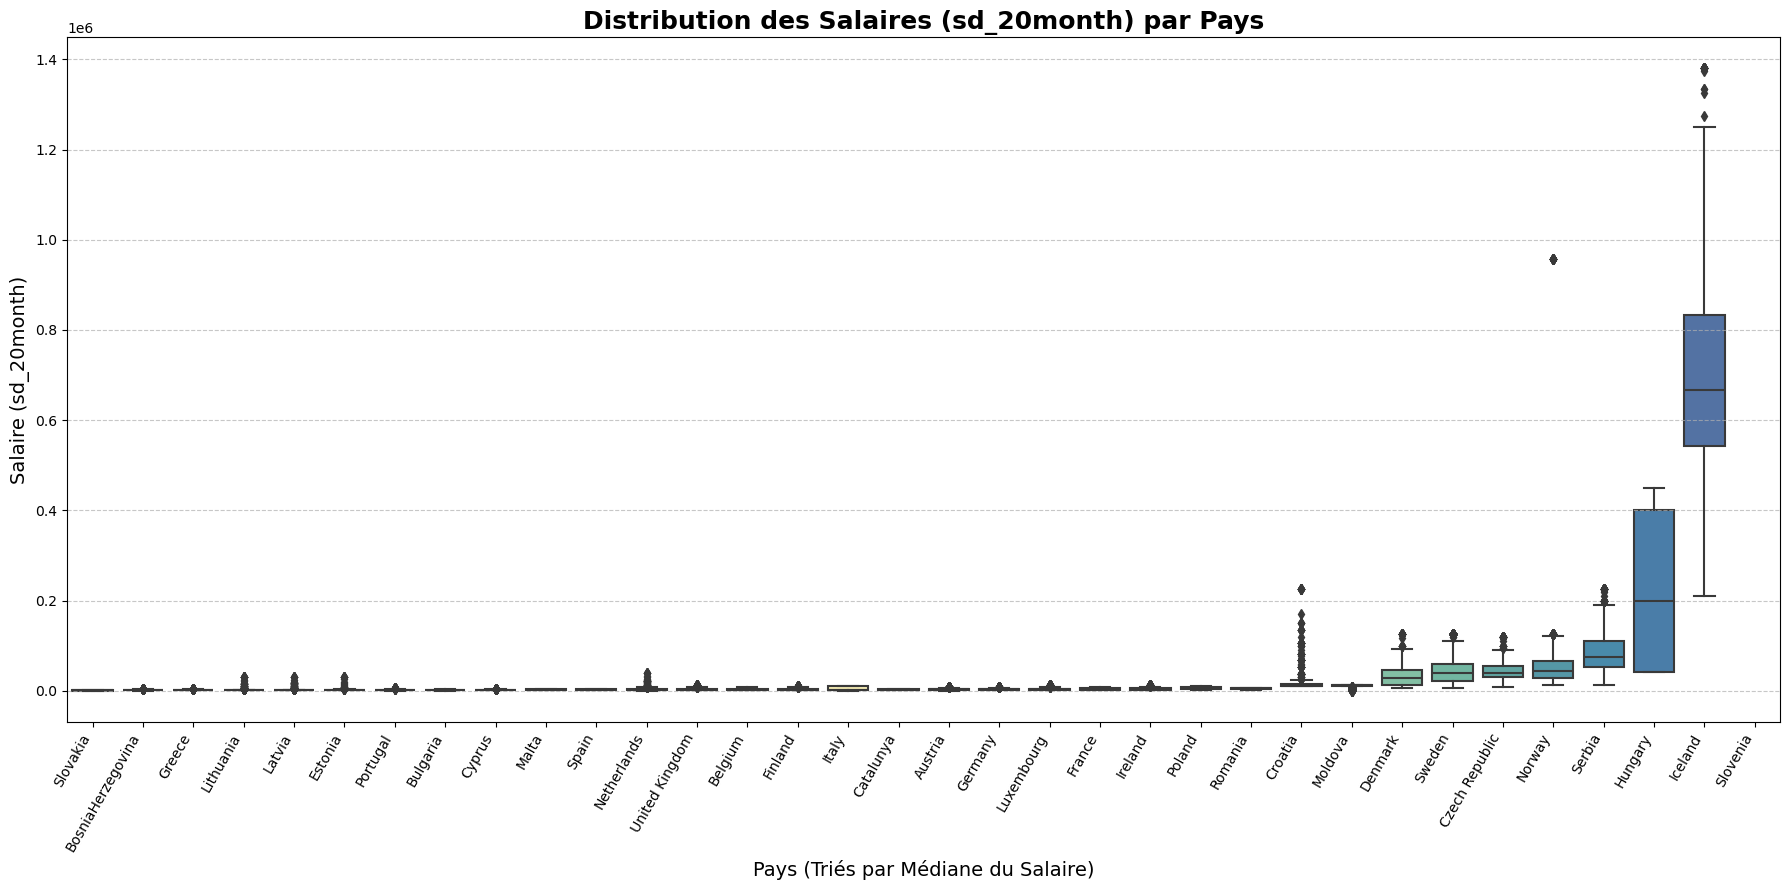

In [ ]:

median_order = data.groupby('COUNTRY')['sd_20month'].median().sort_values().index

# 2. Création de la figure pour le Boxplot
plt.figure(figsize=(18, 9))

# Boxplot pour visualiser la distribution du salaire ('sd_20month') par pays
sns.boxplot(
    x='COUNTRY',      # Les noms des pays (abscisse)
    y='sd_20month',   # Le salaire (ordonnée)
    data=data,
    order=median_order, # Application de l'ordre trié par la médiane
    palette='Spectral'  
)



plt.title('Distribution des Salaires (sd_20month) par Pays', fontsize=18, weight='bold')
plt.xlabel('Pays (Triés par Médiane du Salaire)', fontsize=14)
plt.ylabel('Salaire (sd_20month)', fontsize=14)


plt.xticks(rotation=60, ha='right', fontsize=10) 

plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show()

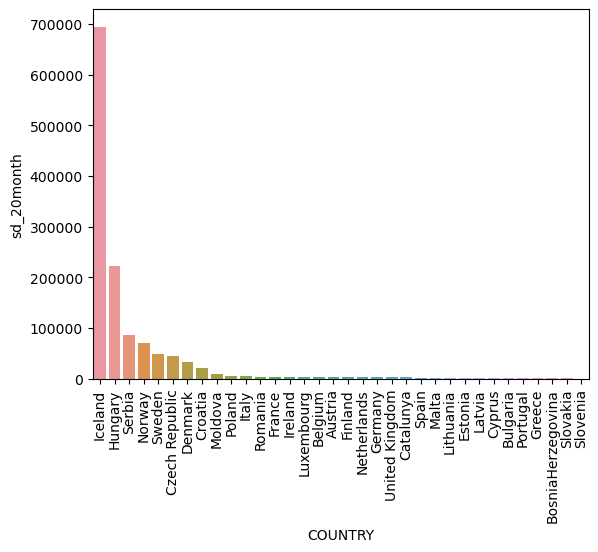

In [ ]:
datalc= data.groupby('COUNTRY')['sd_20month'].mean().sort_values(ascending=False)

#diagramme du salaire mensuel moyen par pays (en cl d'alcool pur par an)
datalc = datalc.reset_index()
sns.barplot(x='COUNTRY', y='sd_20month', data=datalc)
plt.xticks(rotation=90)
plt.show()
#IL Y A UN GROS PROBLEME !!!!!!!!! ON RETIRE LES VALEURS ABERRANTES FINALEMENT ?????? Non c'est en monnaie nationale attention serbie et islande problème d'après codebook

In [145]:
# 1. Définir les taux de conversion (Unité Locale -> EUR) au 01/01/2020.
# Le taux est la valeur de 1 unité de la devise locale en EUR (1 / Taux (1 EUR = X Unités))
# Par exemple, pour PLN : 1 EUR = 4.256 PLN, donc 1 PLN = 1/4.256 EUR = 0.235 EUR
# Pour le GBP : 1 EUR = 0.844 GBP, donc 1 GBP = 1/0.844 EUR = 1.185 EUR

conversion_rates = {
    # Pays en EUR (Taux = 1)
    'Austria': 1.0, 'Belgium': 1.0, 'Cyprus': 1.0, 'Finland': 1.0, 'France': 1.0,
    'Germany': 1.0, 'Greece': 1.0, 'Ireland': 1.0, 'Italy': 1.0, 'Luxembourg': 1.0,
    'Malta': 1.0, 'Netherlands': 1.0, 'Portugal': 1.0, 'Slovakia': 1.0, 'Slovenia': 1.0,
    'Spain': 1.0, 'Catalunya': 1.0, 'Estonia': 1.0, 'Latvia': 1.0, 'Lithuania': 1.0,

    # Hors Zone Euro
    'BosniaHerzegovina': 1 / 1.956,  # BAM (Converti à un taux fixe)
    'Bulgaria': 1 / 1.956,           # BGN (Converti à un taux fixe)
    'Croatia': 1 / 7.430,            # HRK
    'Denmark': 1 / 7.472,            # DKK
    'Hungary': 1 / 330.50,           # HUF
    'Iceland': 1 / 138.83,           # ISK
    'Moldova': 1 / 19.33,            # MDL
    'Norway': 1 / 9.855,             # NOK
    'Poland': 1 / 4.256,             # PLN
    'Romania': 1 / 4.779,            # RON
    'Serbia': 1 / 117.85,            # RSD
    'Sweden': 1 / 10.467,            # SEK
    'Czech Republic': 1 / 25.40,     # CZK
    'United Kingdom': 1 / 0.844,     # GBP (1 GBP ≈ 1.185 EUR)
}

# 2. Créer une colonne de taux de conversion dans le DataFrame
# Assurez-vous que la colonne 'COUNTRY' est déjà mappée aux noms complets !
data['EXCHANGE_RATE_TO_EUR'] = data['COUNTRY'].map(conversion_rates)

# 3. Appliquer la conversion à la variable 'sd_20month'
# Si sd_20month est bien dans la devise locale :
data['sd_20month_EUR_2020'] = data['sd_20month'] * data['EXCHANGE_RATE_TO_EUR']

# Afficher les premières lignes et la nouvelle colonne pour vérification
print(data[['COUNTRY', 'sd_20month', 'EXCHANGE_RATE_TO_EUR', 'sd_20month_EUR_2020']].head(10))

          COUNTRY   sd_20month  EXCHANGE_RATE_TO_EUR  sd_20month_EUR_2020
0  United Kingdom   666.666667              1.184834           789.889416
1  United Kingdom  2083.333333              1.184834          2468.404423
2       Lithuania  1500.000000              1.000000          1500.000000
3       Lithuania  1500.000000              1.000000          1500.000000
4       Lithuania  1500.000000              1.000000          1500.000000
5         Romania  5250.000000              0.209249          1098.556183
6         Romania  1200.000000              0.209249           251.098556
7       Lithuania  2500.000000              1.000000          2500.000000
8       Lithuania          NaN              1.000000                  NaN
9         Romania  3500.000000              0.209249           732.370789


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_24460\2774319098.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['EXCHANGE_RATE_TO_EUR'] = data['COUNTRY'].map(conversion_rates)
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_24460\2774319098.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sd_20month_EUR_2020'] = data['sd_20month'] * data['EXCHANGE_RATE_TO_EUR']


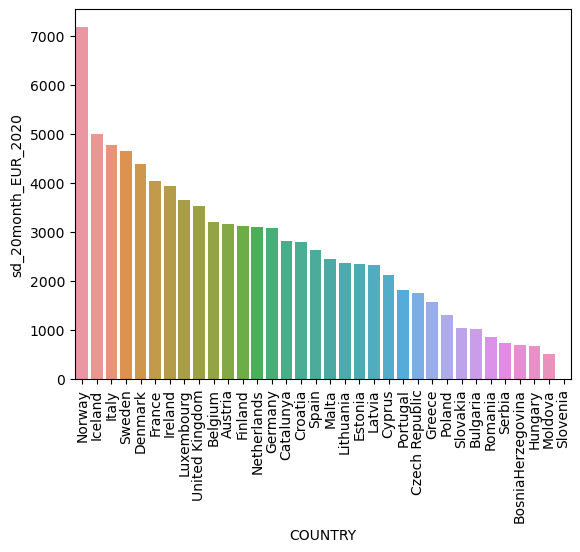

In [ ]:
datalc1= data.groupby('COUNTRY')['sd_20month_EUR_2020'].mean().sort_values(ascending=False)

#diagramme du salaire mensuel moyen par pays (en cl d'alcool pur par an)
datalc1 = datalc1.reset_index()
sns.barplot(x='COUNTRY', y='sd_20month_EUR_2020', data=datalc1)
plt.xticks(rotation=90)
plt.show()

On remarque que cette distribution des revenus n'est pas toujours cohérente avec la réalité des distributions moyennes de revenus entre les pays européens. Par exemple, le revenu moyen déclaré par les italiens interrogés est supérieur à celui des irlandais interrogés, ce qui n'est pas vrai dans la population totale. Cela témoigne soit d'un biais déclaratif plus élevé dans certains pays que d'autres, soit du fait que les personnes interrogées dans certains pays (en Italie par exemple) font partie d'une partie plus favorisée économiquement de la population de leur pays que les individus interrogés dans d'autres pays (par exemple l'Irlande). Le cas échéant, cela signifie que les personnes interrogées ne sont pas équitablement répartis dans la distribution des revenus, dans certains pays du moins (ce que Kilian et Al. pointent du doigt dans leur papier "The socioeconomic profile of alcohol use in Europe: Findings
from a cross-sectional survey of 33 European countries" qui analyse Deepseas du point de vue Européen.)

In [ ]:


# Liste des variables quantitatives
quantitatives = ["SD_2", "SD_7", "sd_20month", "bsqf_alc", "rf_1b", "RSOD_2b", "RSOD_7b"]

data_subset = data[quantitatives].dropna()
correlation_matrix = data_subset.corr(method='pearson')

# 2. Visualisation (Heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,          # Afficher les coefficients
    fmt=".2f",
    cmap='coolwarm',
    linewidths=.5,
    linecolor='black'
)
plt.title('Matrice de Corrélation SEAS-2')
plt.show()

ValueError: could not convert string to float: '8,5'

In [ ]:
#statistiques descriptives de toutes les variables quantitatives
tab = data.select_dtypes(include='float').describe().T[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
labels = {
    'SD_2': 'Age',
    'SD_7': 'Nombre d\'enfant dans le foyer',
    'sd_20month': 'Salaire mensuel',
    'bsqf_alc': 'Consommation alcool annuel',
    'rf_1b': 'Frequence consommation alcool',
    'RSOD_2b': 'Fréquence de grande consommation',
    'RSOD_7b': 'Variable RSOD_7b'
    # Ajoutez les autres variables selon vos besoins
}

# Ajouter la colonne label en première position
tab.insert(0, 'label', tab.index.map(labels))
styled_tab = tab.style \
    .format({col: '{:.2f}' for col in tab.columns if col != 'label'}) \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#4472C4'), ('color', 'white'), ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('padding', '10px'), ('color', 'black')]},
        {'selector': 'tbody tr:nth-child(even)', 'props': [('background-color', '#E7E6E6')]},
        {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', '#F2F2F2')]}
    ])

styled_tab

,label,count,mean,std,min,25%,50%,75%,max
SD_2,Age,56014.00,41.06,12.82,18.00,30.00,41.00,52.00,64.00
sd_20month,Salaire mensuel,42456.00,41727.56,143282.45,125.00,1500.04,3000.50,11250.00,1380000.00
bsqf_alc,Consommation alcool annuel,55483.00,1606.70,16055.35,0.00,33.67,216.75,797.47,1544380.00


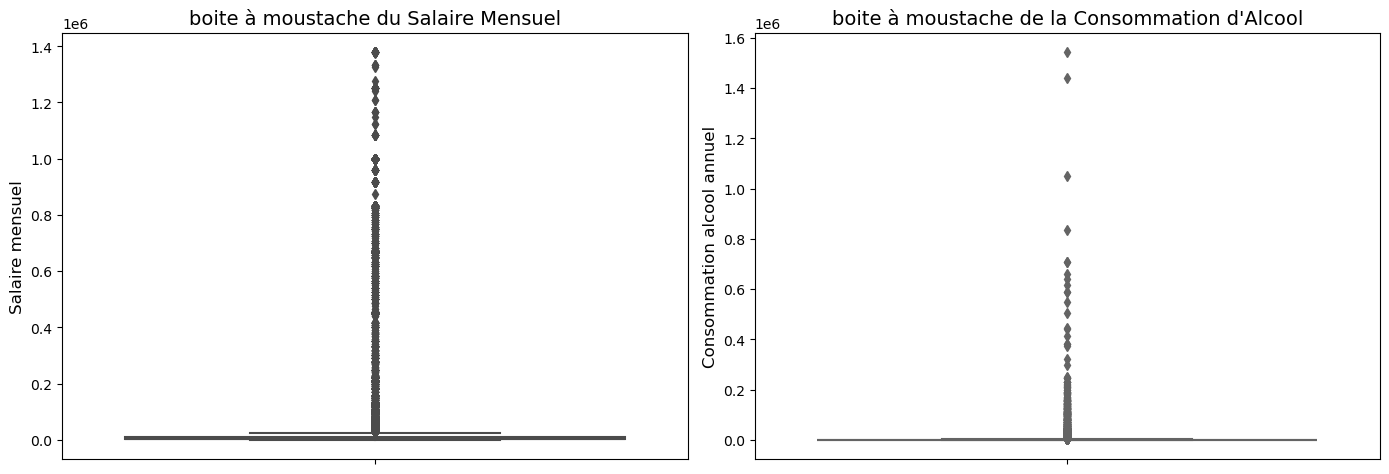

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot pour les salaires
sns.boxplot(y='sd_20month', data=data, ax=ax1, color='steelblue')
ax1.set_title('boite à moustache du Salaire Mensuel', fontsize=14)
ax1.set_ylabel('Salaire mensuel', fontsize=12)

# Boxplot pour la consommation d'alcool
sns.boxplot(y='bsqf_alc', data=data, ax=ax2, color='coral')
ax2.set_title('boite à moustache de la Consommation d\'Alcool', fontsize=14)
ax2.set_ylabel('Consommation alcool annuel', fontsize=12)

plt.tight_layout()
plt.show()

Ces graphiques confirment les suspicions de valeurs extrèmes dans ces variables.

In [ ]:
import pandas as pd
import numpy as np
#Pourcentage d'outliers par pays en par rapport aux quantiles PAR PAYS

# --- 1. Définition de la fonction de calcul du pourcentage d'outliers ---
def calculate_outlier_percentage(series):
    """
    Calcule le pourcentage de valeurs aberrantes (outliers) dans une série
    en utilisant la méthode de l'Écart InterQuartile (IQR).
    """
    # Exclure les valeurs manquantes avant le calcul
    series = series.dropna()

    # Si le pays n'a aucune donnée, retourner 0%
    if series.empty:
        return 0.0

    # 1. Calculer les quartiles et l'IQR
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    # 2. Définir les limites
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 3. Compter les valeurs aberrantes
    outliers_count = series[(series < lower_bound) | (series > upper_bound)].count()

    # 4. Calculer le pourcentage
    total_count = series.count()
    outlier_percentage = (outliers_count / total_count) * 100

    return outlier_percentage

# --- 2. Application de la fonction par pays ---
# On utilise groupby() sur 'COUNTRY' et apply() la fonction sur 'bsqf_alc'.

outlier_percentage_by_country = (
    data
    .groupby('COUNTRY')['bsqf_alc']
    .apply(calculate_outlier_percentage)
    .sort_values(ascending=False)
)

# --- 3. Affichage des résultats ---

print("="*70)
print("Pourcentage de valeurs aberrantes (Outliers) de 'bsqf_alc' par pays (Méthode IQR)")
print("="*70)

# Filtrer et formater pour l'affichage (seulement les pays avec des outliers)
outlier_df = outlier_percentage_by_country[outlier_percentage_by_country > 0].reset_index(name='Pourcentage_Outliers')

# Arrondir le pourcentage à deux décimales et ajouter le signe %
outlier_df['Pourcentage_Outliers'] = outlier_df['Pourcentage_Outliers'].round(2).astype(str) + '%'

print(outlier_df)
print("\n")

# Affichage des statistiques sommaires
print(f"\nPourcentage d'outliers moyen dans tous les pays: {outlier_percentage_by_country.mean():.2f}%")
print(f"Pays avec le pourcentage maximum: {outlier_percentage_by_country.idxmax()} ({outlier_percentage_by_country.max():.2f}%)")

Pourcentage de valeurs aberrantes (Outliers) de 'bsqf_alc' par pays (Méthode IQR)
              COUNTRY Pourcentage_Outliers
0             Denmark               14.15%
1               Malta                13.6%
2   BosniaHerzegovina                13.4%
3             Estonia               12.77%
4           Catalunya               12.62%
5              Norway               12.31%
6             Iceland               12.25%
7              Latvia               12.15%
8             Belgium               11.81%
9               Spain               11.68%
10           Bulgaria               11.54%
11          Lithuania               11.44%
12            Moldova               11.42%
13             Sweden               11.32%
14           Slovenia               11.28%
15            Austria               11.25%
16             Cyprus               11.23%
17           Slovakia               11.19%
18            Ireland               10.93%
19             Greece               10.86%
20            G

In [ ]:


# --- 1. Calcul des bornes d'outliers globales sur l'ensemble de la base de données ---
series_global = data['bsqf_alc'].dropna()

Q1_global = series_global.quantile(0.25)
Q3_global = series_global.quantile(0.75)
IQR_global = Q3_global - Q1_global

lower_bound_global = Q1_global - 1.5 * IQR_global
upper_bound_global = Q3_global + 1.5 * IQR_global


# --- 2. Définition de la fonction de calcul du pourcentage d'outliers globaux par pays ---
def calculate_global_outlier_percentage(group, lower_bound, upper_bound):
    """
    Calcule le pourcentage d'outliers dans un groupe (pays) en utilisant
    les bornes globales fournies.
    """
    series = group.dropna()

    if series.empty:
        return 0.0

    # Compter les valeurs aberrantes par rapport aux bornes globales
    outliers_count = series[(series < lower_bound) | (series > upper_bound)].count()

    # Calculer le pourcentage par rapport au total des observations non manquantes du pays
    total_count = series.count()
    outlier_percentage = (outliers_count / total_count) * 100

    return outlier_percentage

# --- 3. Application de la fonction par pays ---
outlier_percentage_global = (
    data
    .groupby('COUNTRY')['bsqf_alc']
    .apply(calculate_global_outlier_percentage, lower_bound=lower_bound_global, upper_bound=upper_bound_global)
    .sort_values(ascending=False)
)

# --- 4. Affichage des résultats ---
print(f"Bornes d'outliers globales (sur l'ensemble des données): Q1={Q1_global:.2f}, Q3={Q3_global:.2f}")
print(f"Limite Inférieure = {lower_bound_global:.2f}, Limite Supérieure = {upper_bound_global:.2f}\n")

print("="*70)
print("Pourcentage de valeurs aberrantes (Outliers) de 'bsqf_alc' par pays (Bornes Globales)")
print("="*70)

outlier_df = outlier_percentage_global.reset_index(name='Pourcentage_Outliers_Global')
outlier_df['Pourcentage_Outliers_Global'] = outlier_df['Pourcentage_Outliers_Global'].round(2).astype(str) + '%'
print(outlier_df)

Bornes d'outliers globales (sur l'ensemble des données): Q1=33.67, Q3=797.47
Limite Inférieure = -1112.04, Limite Supérieure = 1943.18

Pourcentage de valeurs aberrantes (Outliers) de 'bsqf_alc' par pays (Bornes Globales)
              COUNTRY Pourcentage_Outliers_Global
0            Bulgaria                      27.25%
1      United Kingdom                      19.96%
2               Spain                      19.65%
3              Poland                      19.31%
4             Ireland                      17.84%
5             Romania                      16.58%
6             Estonia                      15.38%
7             Belgium                      15.03%
8      Czech Republic                      15.02%
9             Denmark                      14.92%
10              Italy                      14.29%
11           Slovakia                      13.13%
12             Greece                       12.7%
13          Catalunya                      12.55%
14            Finland       

On remarque qu'il n'y a pas d'énormes différences dans les taux de valeurs aberrante de la consommation d'alcool quand ces outliers sont calculés chacuns par rapport au quartile de leur pays. Par contre, il y a de grosses différences de pourcentages de valeurs aberrantes quand on les calculs tous par rapport aux quantiles du dataset global (et les plus grands (resp. + petits) pourcentages d'outliers de ce point de vue sont en moyenne dans les pays qui déclarent consommer en moyenne plus d'alcool (resp. moins d'alcool) ). Ceci est rassurant, cela veut dire que soit il y a des pays extrêmes en termes de consommation d'alcool qui participent donc à créer beaucoup plus ces outliers que les autres, soit dans ces pays il y a des individus qui sur/sous évaluent leur consommation d'alcool plus que dans d'autres pays, ce qui dans les deux cas pourra participer à notre analyse, une fois faites la sélection des pays. Il ne semble donc pas y avoir de problème généralisé de valeurs abberantes non interprétable pour la variable de consommation d'alcool bsqf.

  Dimension  Variance expliquée  % variance expliquée  % cum. var. expliquée
0     Dim 1            2.242705                 32.04                  32.04
1     Dim 2            1.124122                 16.06                  48.09


NameError: name 'components' is not defined

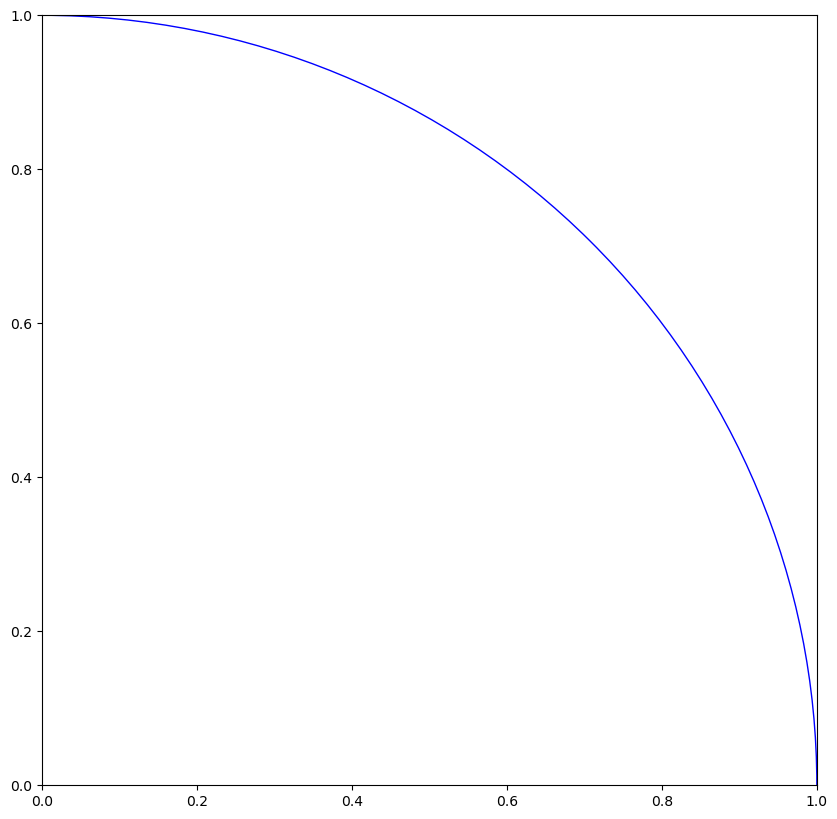

In [ ]:
# Standardisation des données quantitatives
scaler = StandardScaler()
quanti_scaled = scaler.fit_transform(quanti)

# ACP avec 2 composantes principales
pca = PCA(n_components=2)
pca.fit(quanti_scaled)

# Tableau des variances expliquées
eig = pd.DataFrame({
    "Dimension": [f"Dim {x+1}" for x in range(pca.n_components_)],  # Utilisez pca.n_components_ pour la longueur
    "Variance expliquée": pca.explained_variance_,
    "% variance expliquée": np.round(pca.explained_variance_ratio_ * 100, 2),
    "% cum. var. expliquée": np.round(np.cumsum(pca.explained_variance_ratio_) * 100, 2)
})

print(eig)

# Cercle des corrélations
plt.figure(figsize=(10, 10))
circle = plt.Circle((0, 0), 1, color='blue', fill=False)
plt.gca().add_patch(circle)

# Coordonnées des variables sur les axes principaux
loadings = components.T * np.sqrt(pca.explained_variance_)

# Tracé des flèches
for i, var in enumerate(quanti.columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='red', head_width=0.05)
    plt.text(loadings[i, 0] * 1.1, loadings[i, 1] * 1.1, var, color='red')

plt.xlabel(f"Composante Principale 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"Composante Principale 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.title("Cercle des corrélations (ACP)")
plt.grid()
plt.show()
